In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import numpy as np
from datetime import date

In [2]:
load_dotenv()
SERVER = os.getenv("SERVER")
DATABASE = os.getenv("DATABASE")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
DRIVER = os.getenv("DRIVER")
connection_string = f"mssql+pyodbc://{USER}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}"
engine = create_engine(connection_string)


In [3]:
player = pd.read_sql("SELECT * FROM Player", engine)
team = pd.read_sql("SELECT * FROM Team", engine)
game = pd.read_sql("SELECT * FROM Game", engine)
common_player_info = pd.read_sql("SELECT * FROM Common_player_info", engine)
draft_combine_stats = pd.read_sql("SELECT * FROM Draft_combine_stats", engine)
draft_history = pd.read_sql("SELECT * FROM Draft_history", engine)
team_details = pd.read_sql("SELECT * FROM Team_details", engine)
team_history = pd.read_sql("SELECT * FROM Team_history", engine)
game_info = pd.read_sql("SELECT * FROM Game_info", engine)
game_summary = pd.read_sql("SELECT * FROM Game_summary", engine)
other_stats = pd.read_sql("SELECT * FROM Other_stats", engine)
officials = pd.read_sql("SELECT * FROM Officials", engine)
inactive_players = pd.read_sql("SELECT * FROM Inactive_players", engine)
play_by_play = pd.read_sql("SELECT * FROM Play_by_play", engine)
line_score = pd.read_sql("SELECT * FROM Line_score", engine)

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


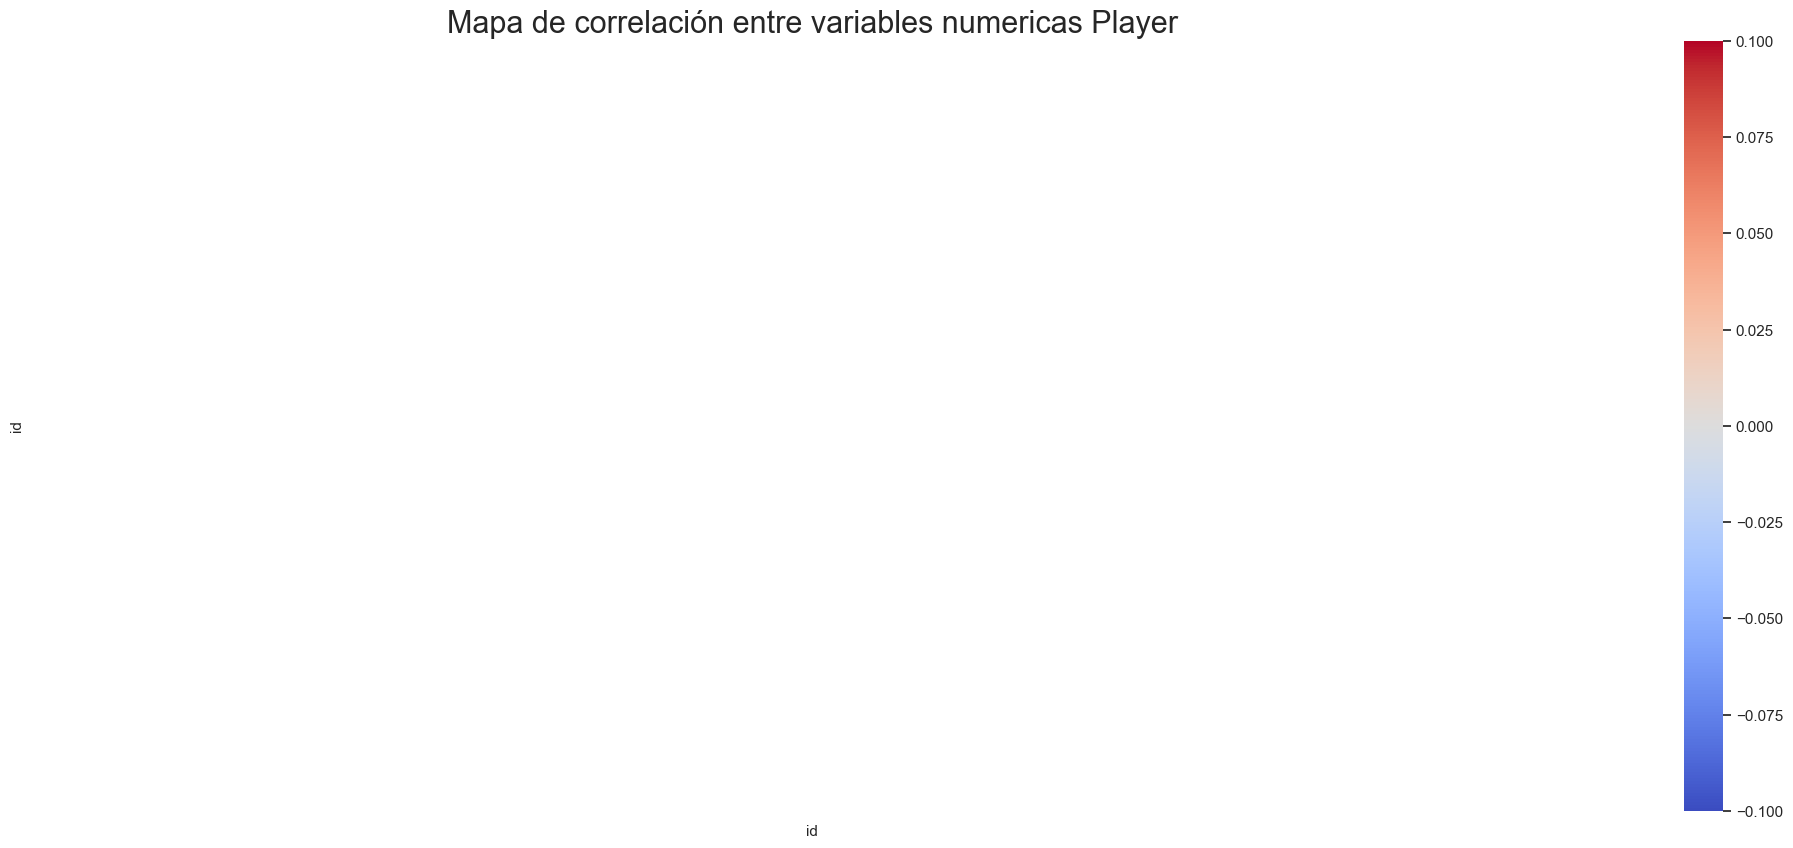

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


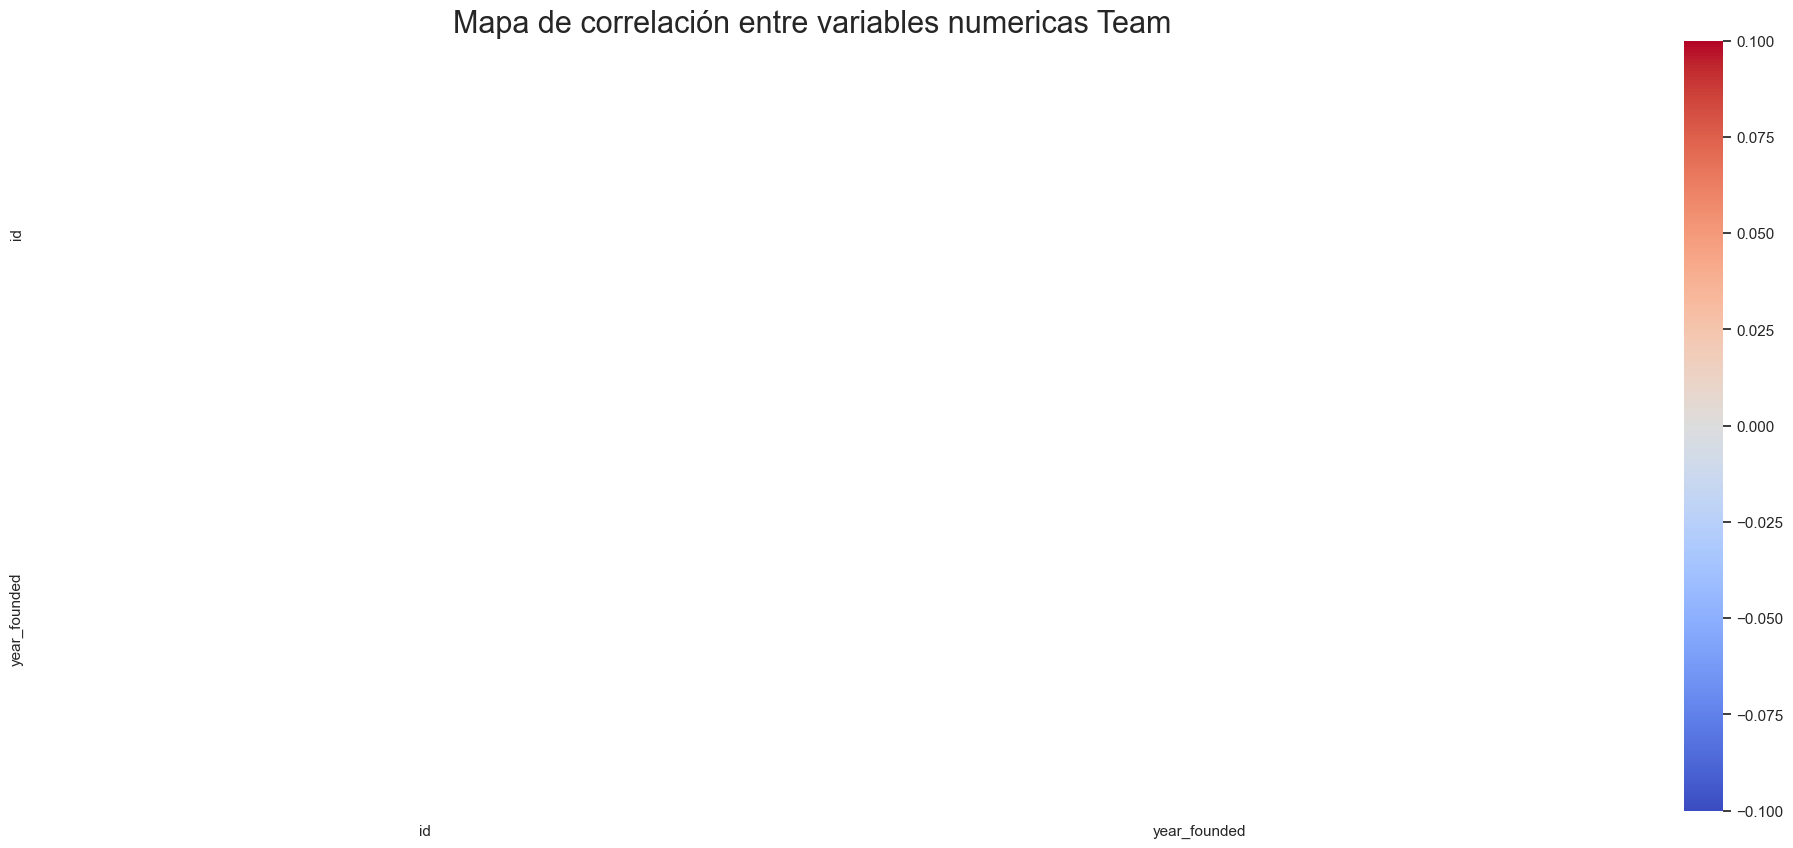

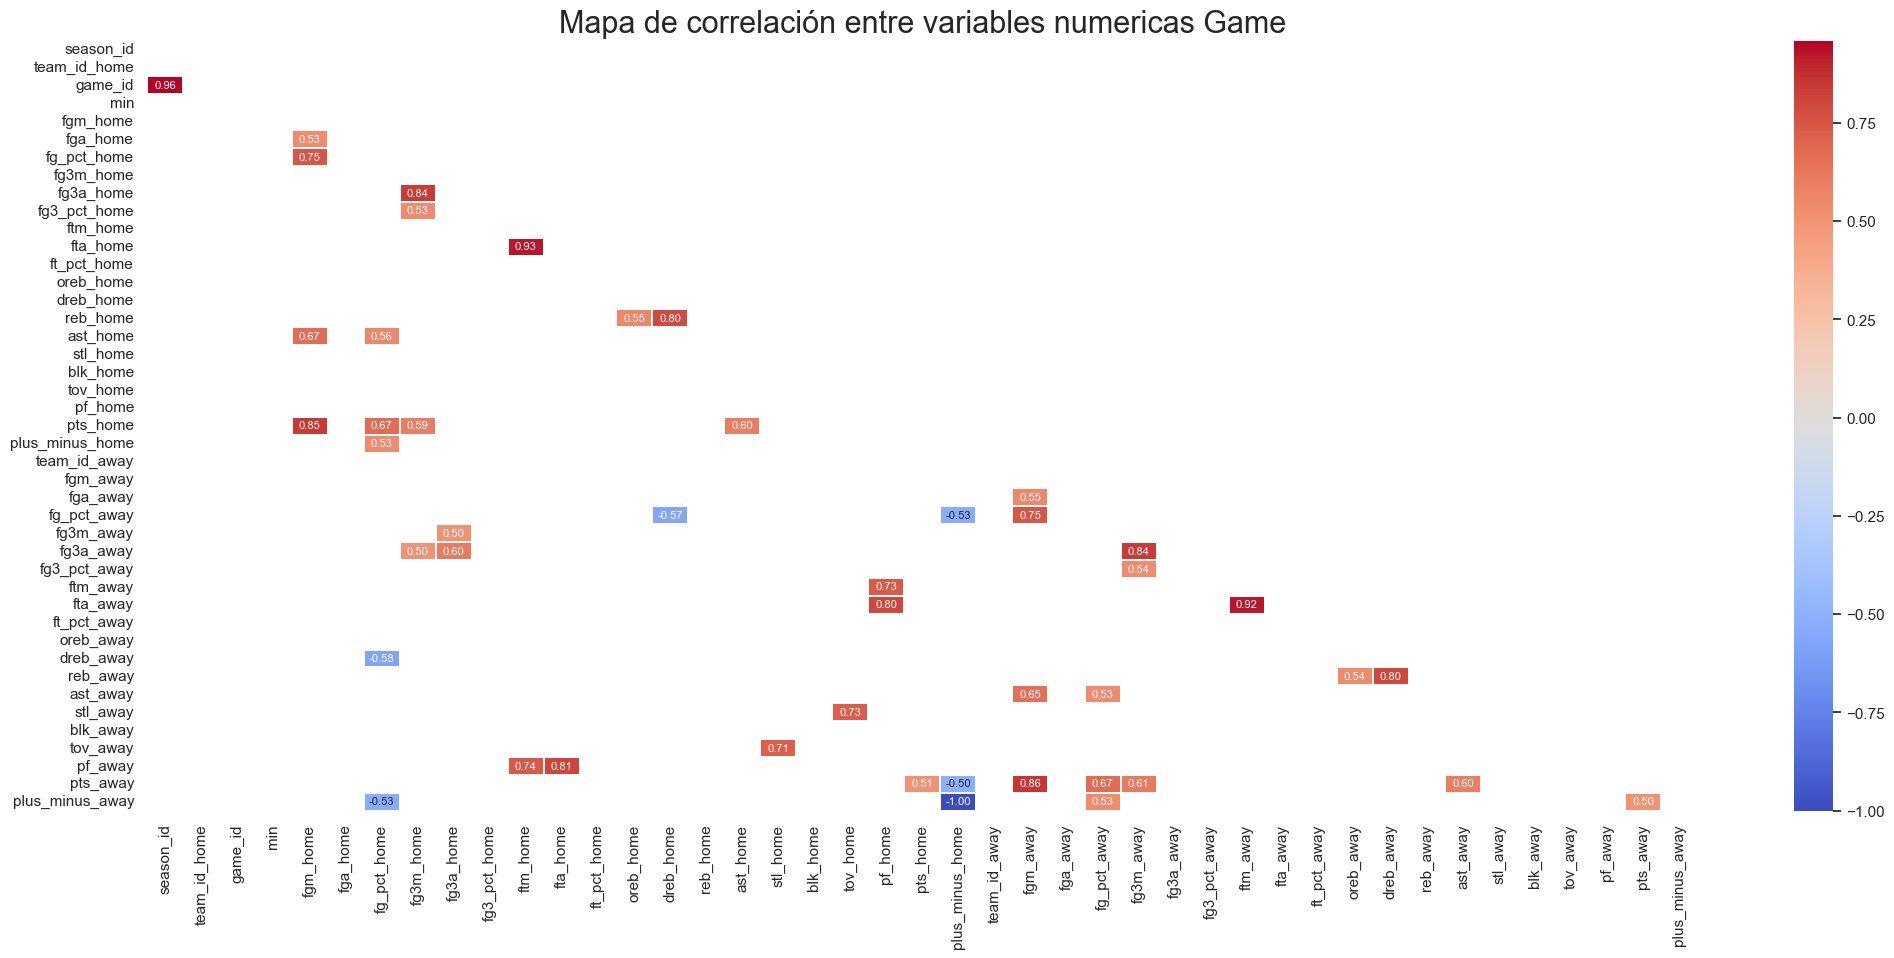

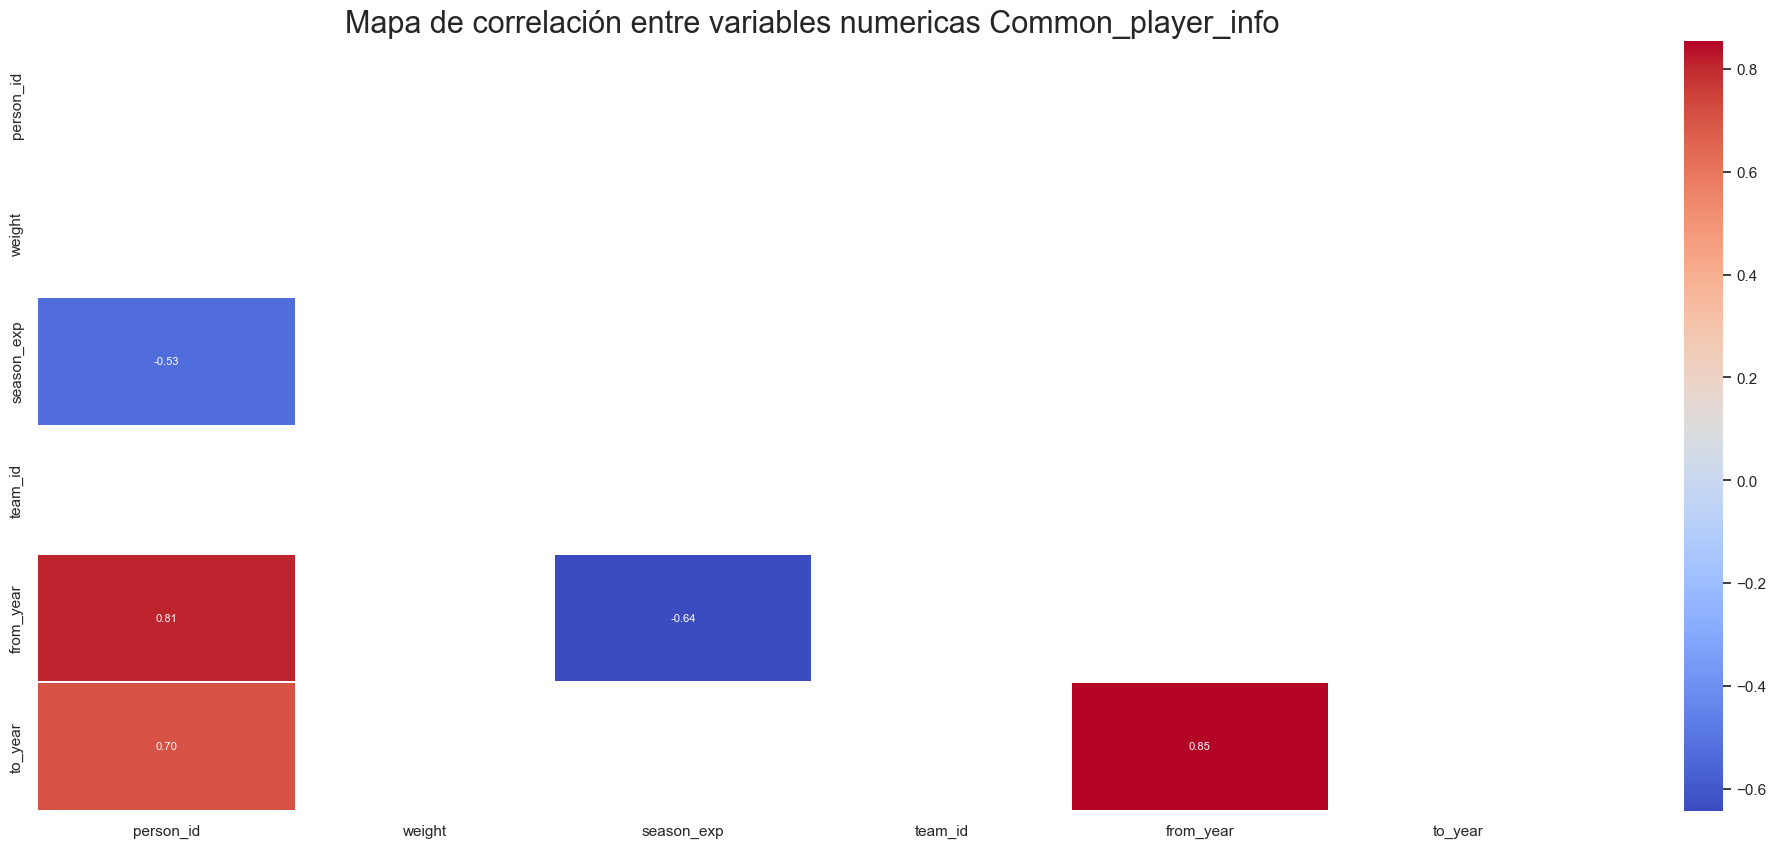

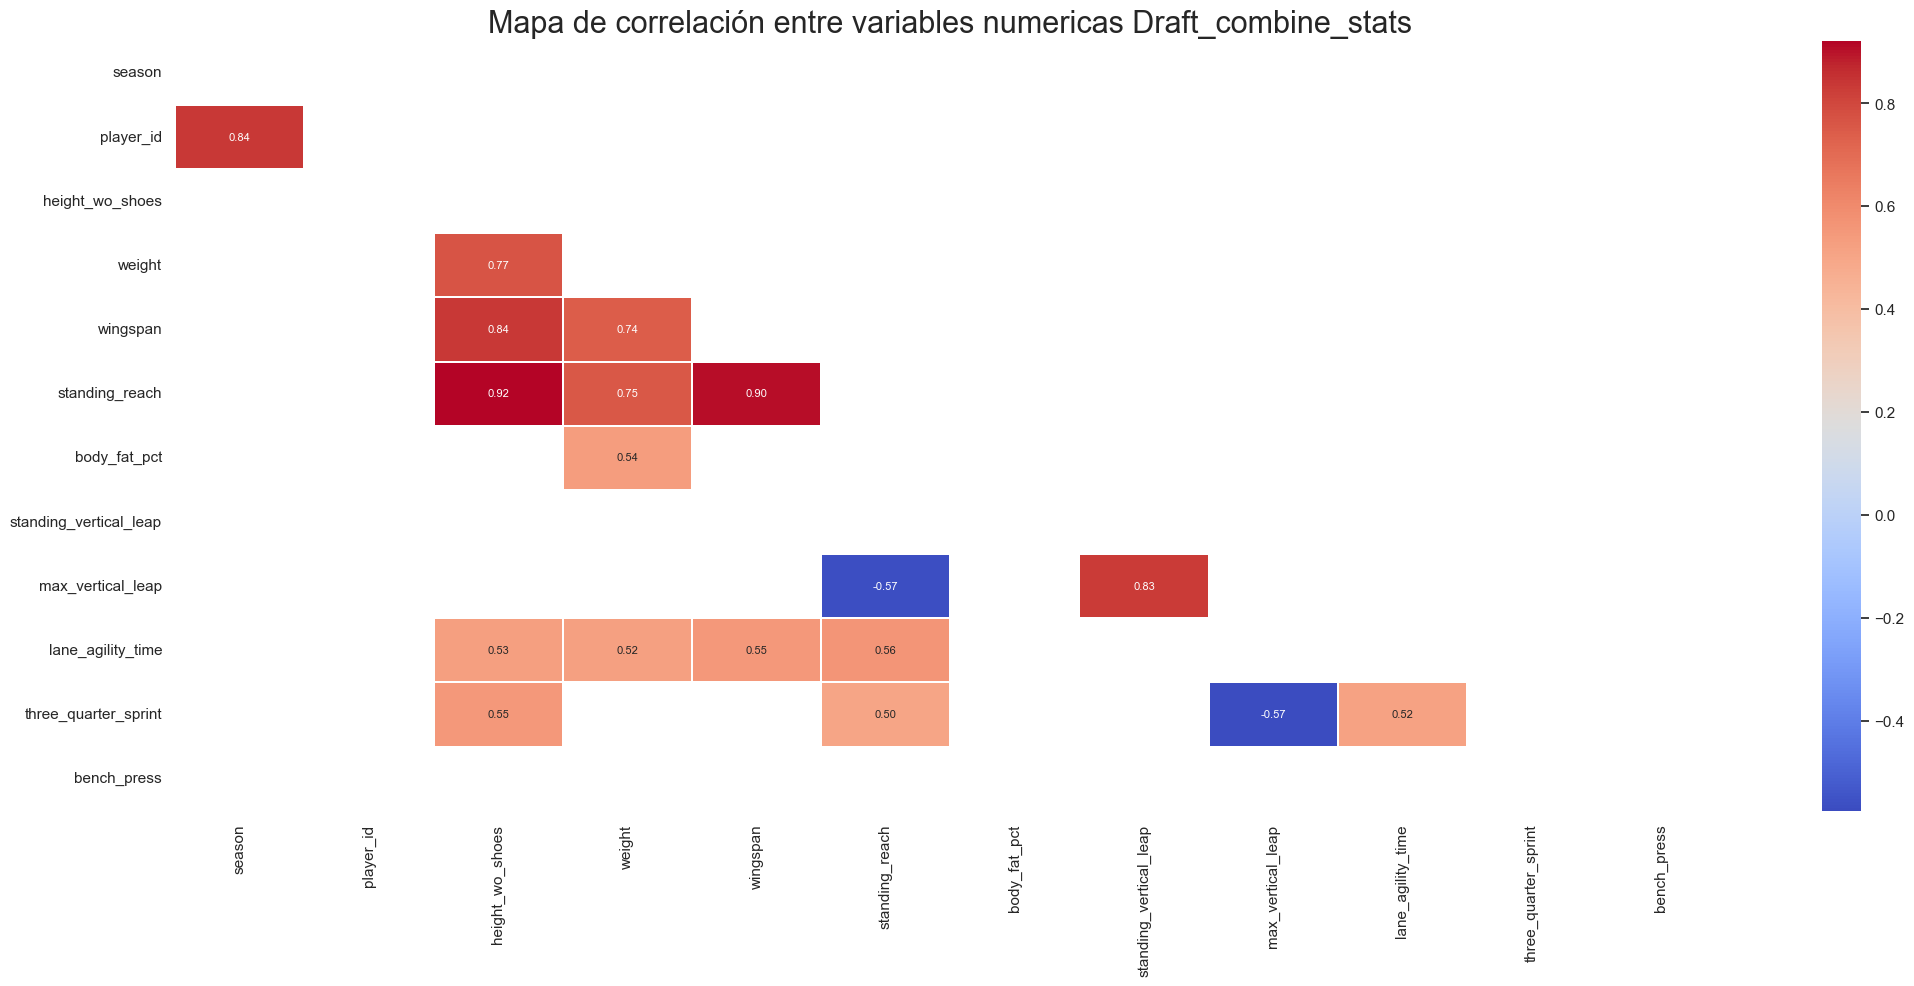

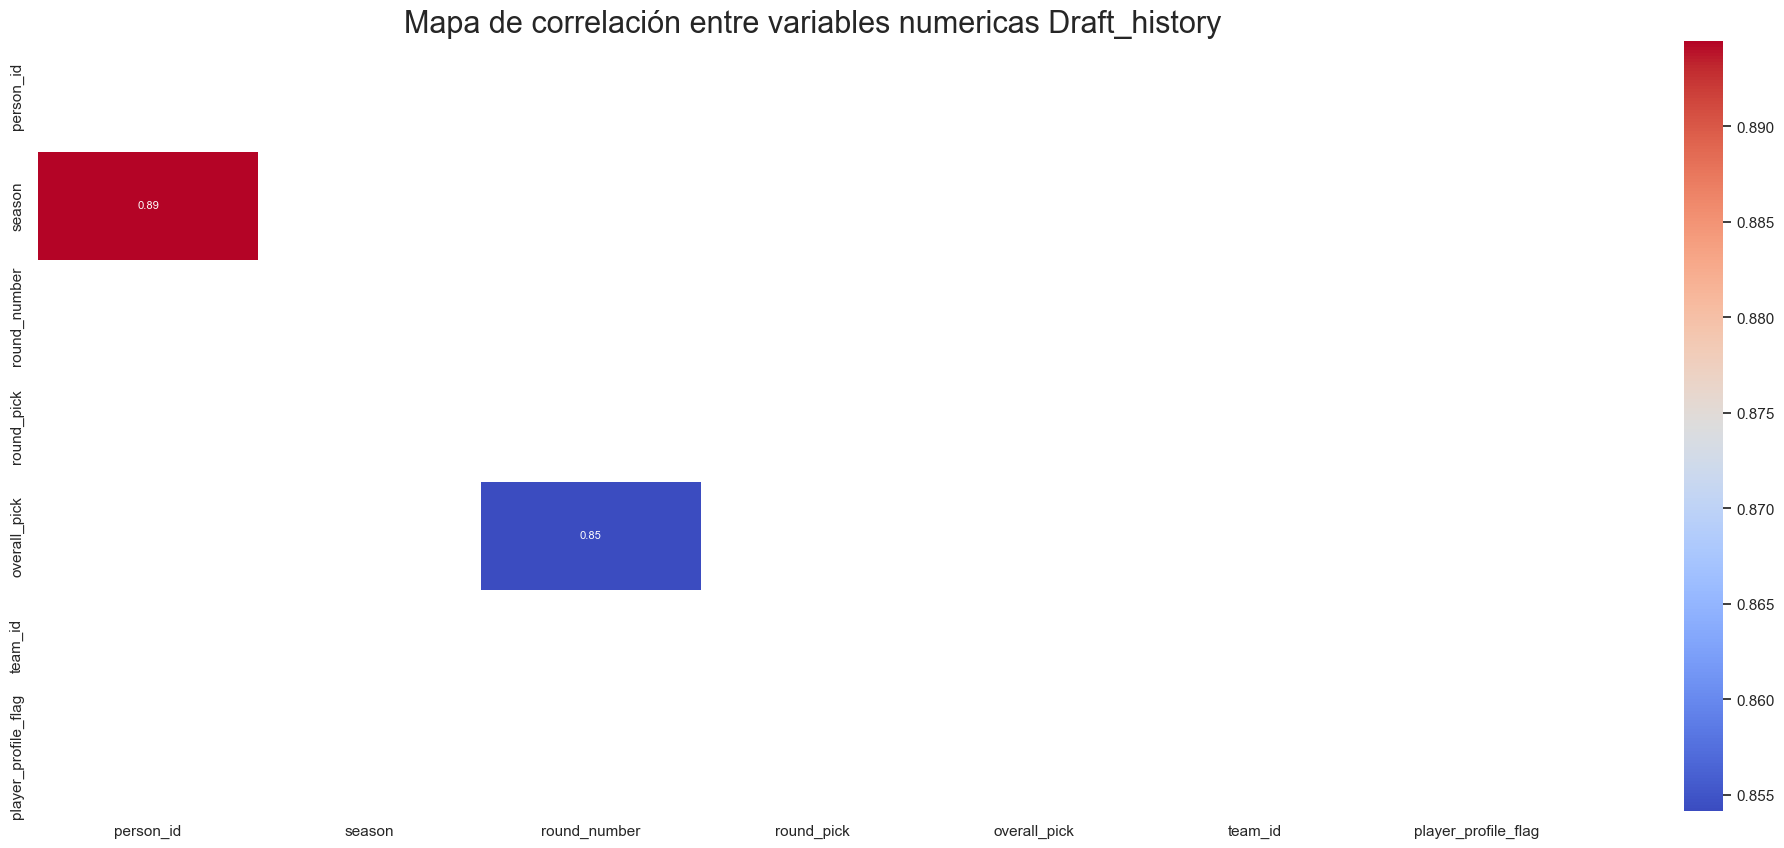

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


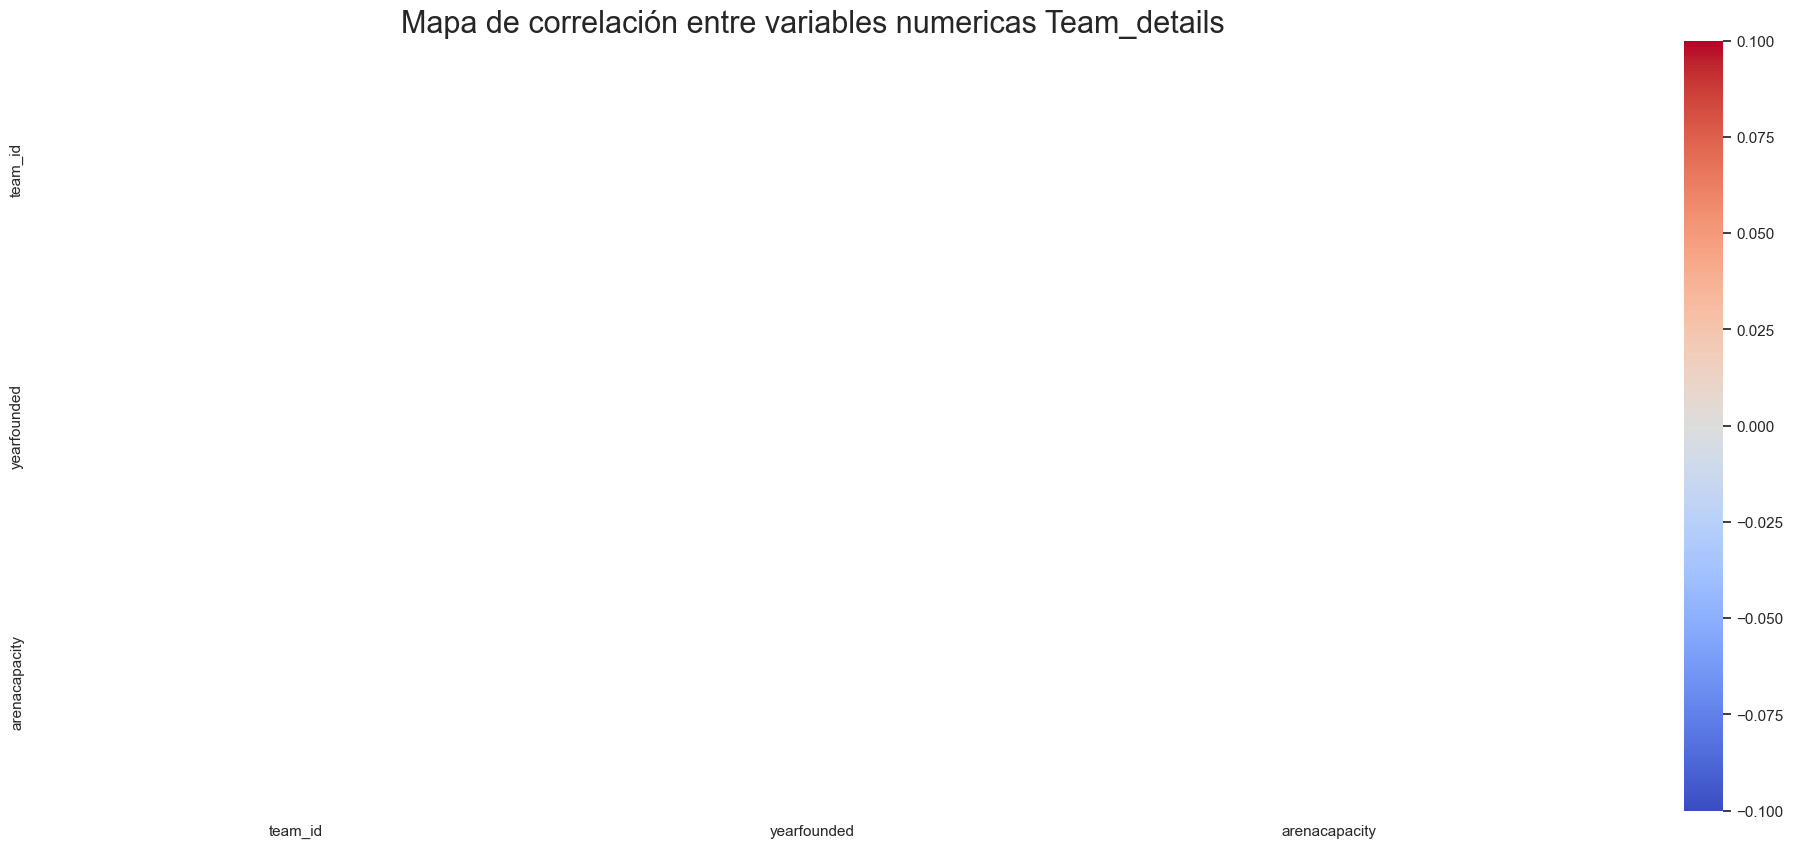

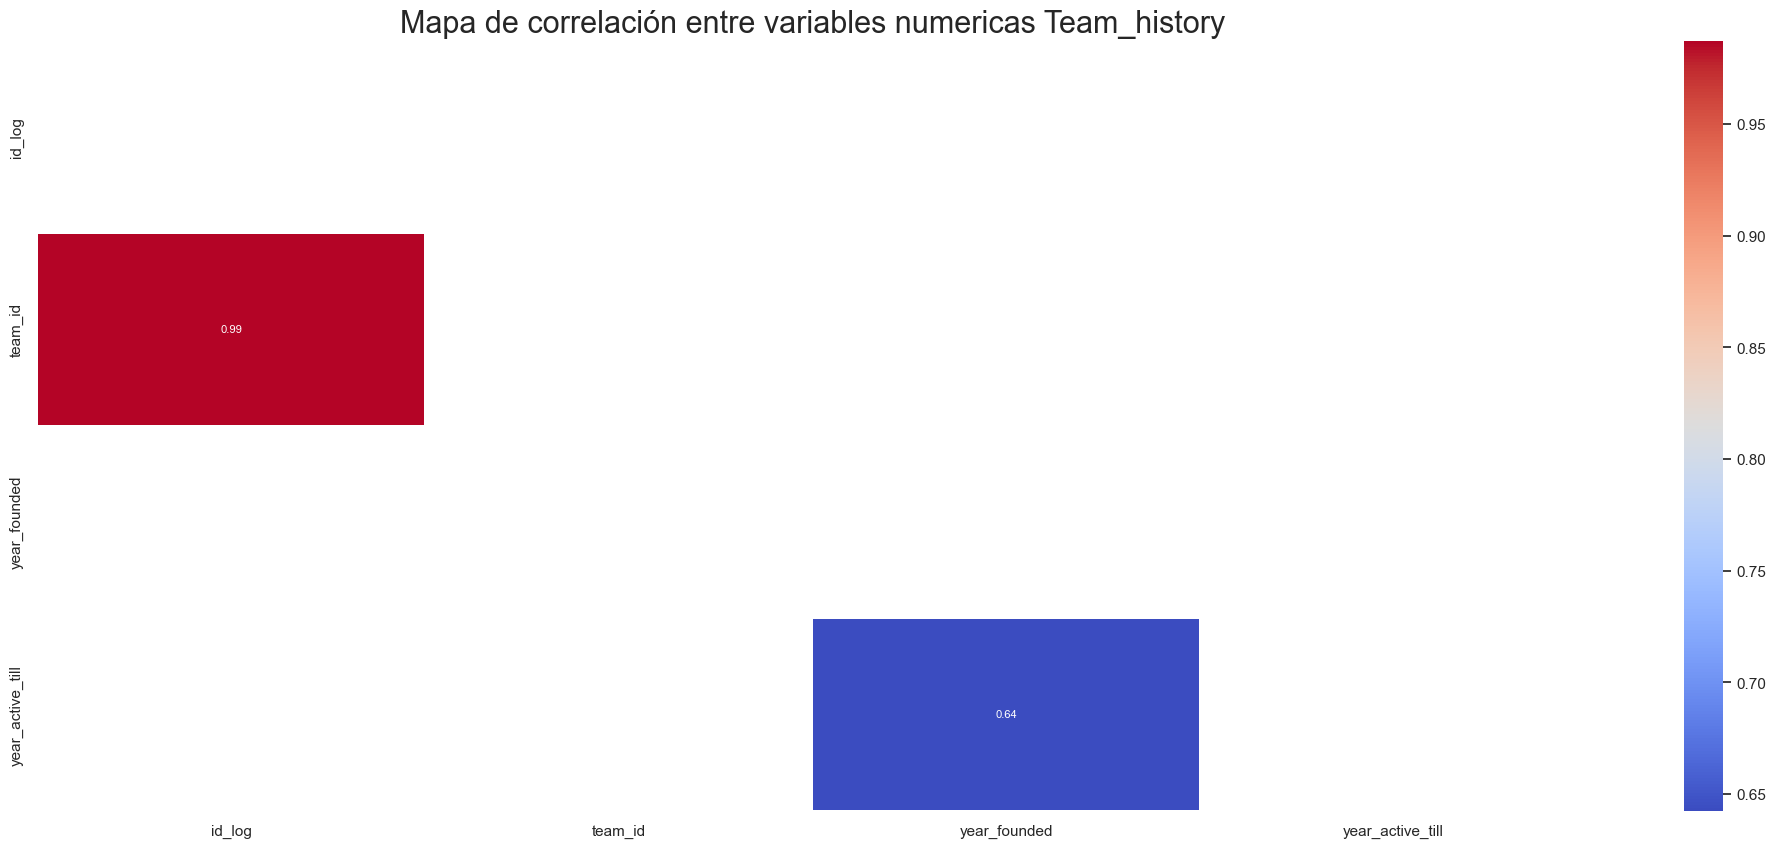

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


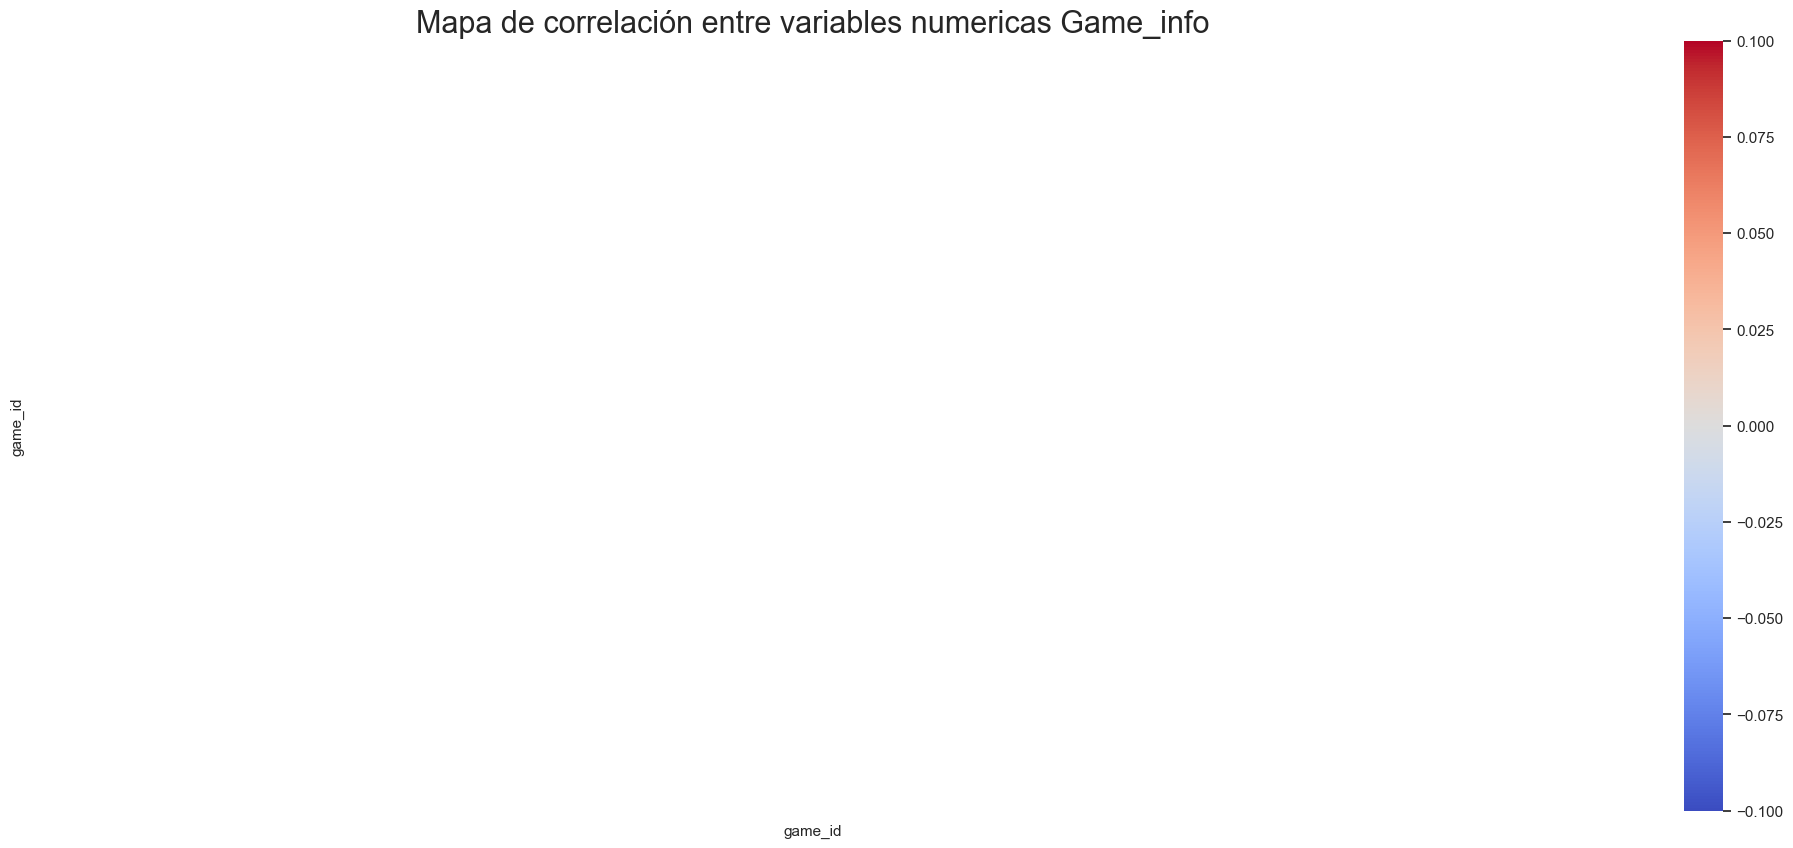

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


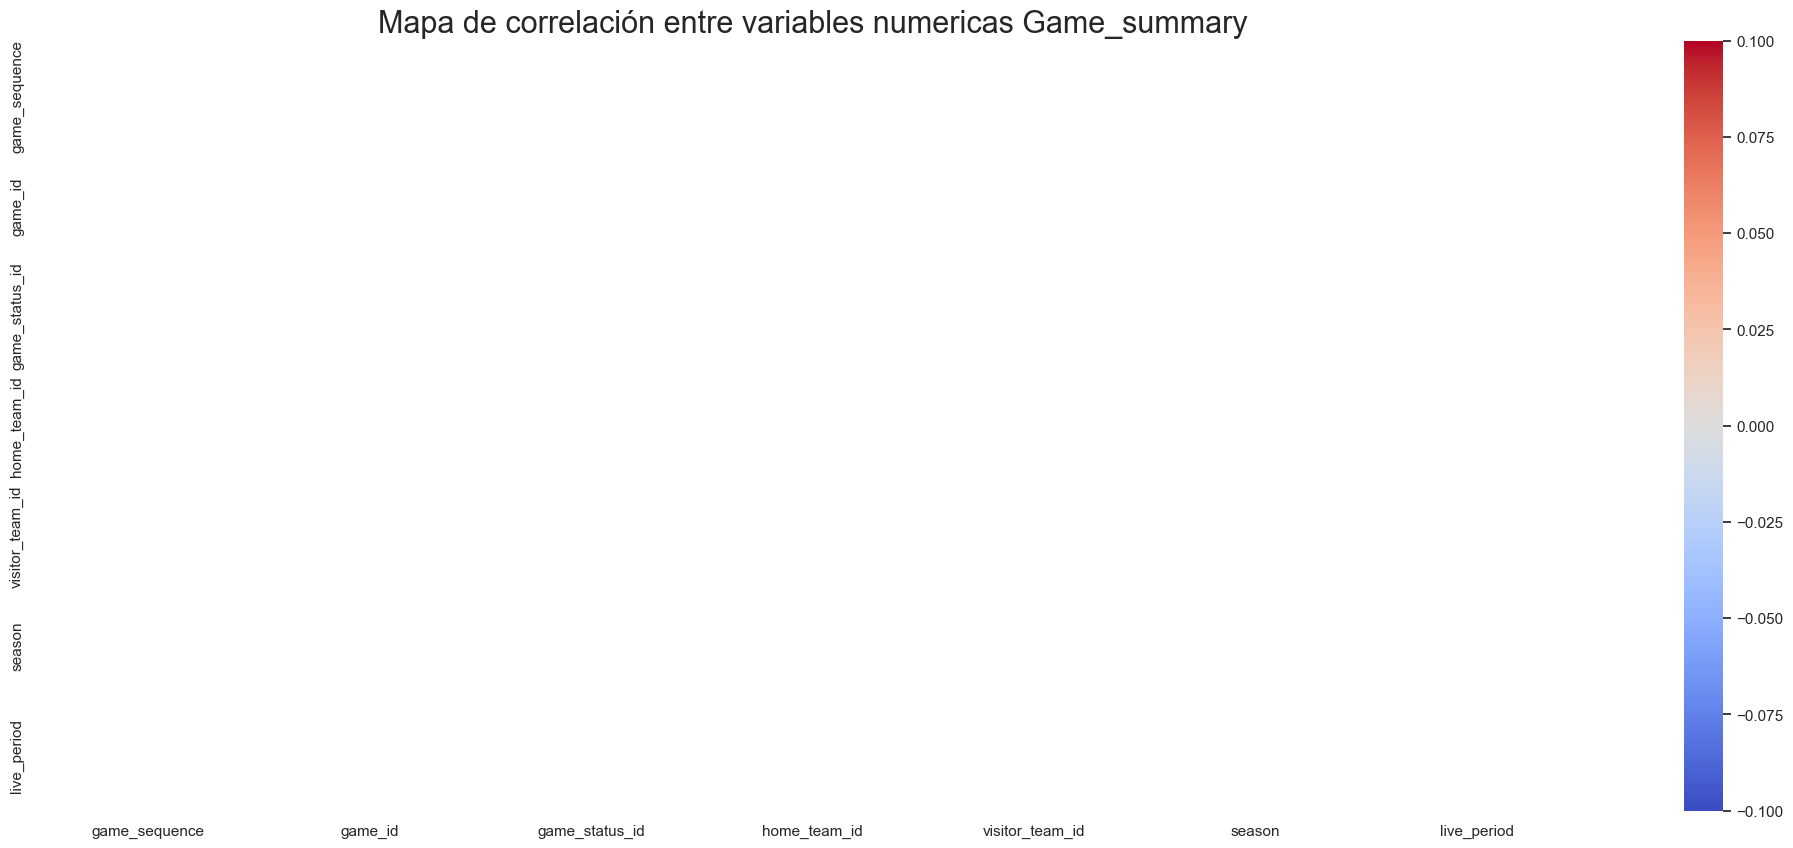

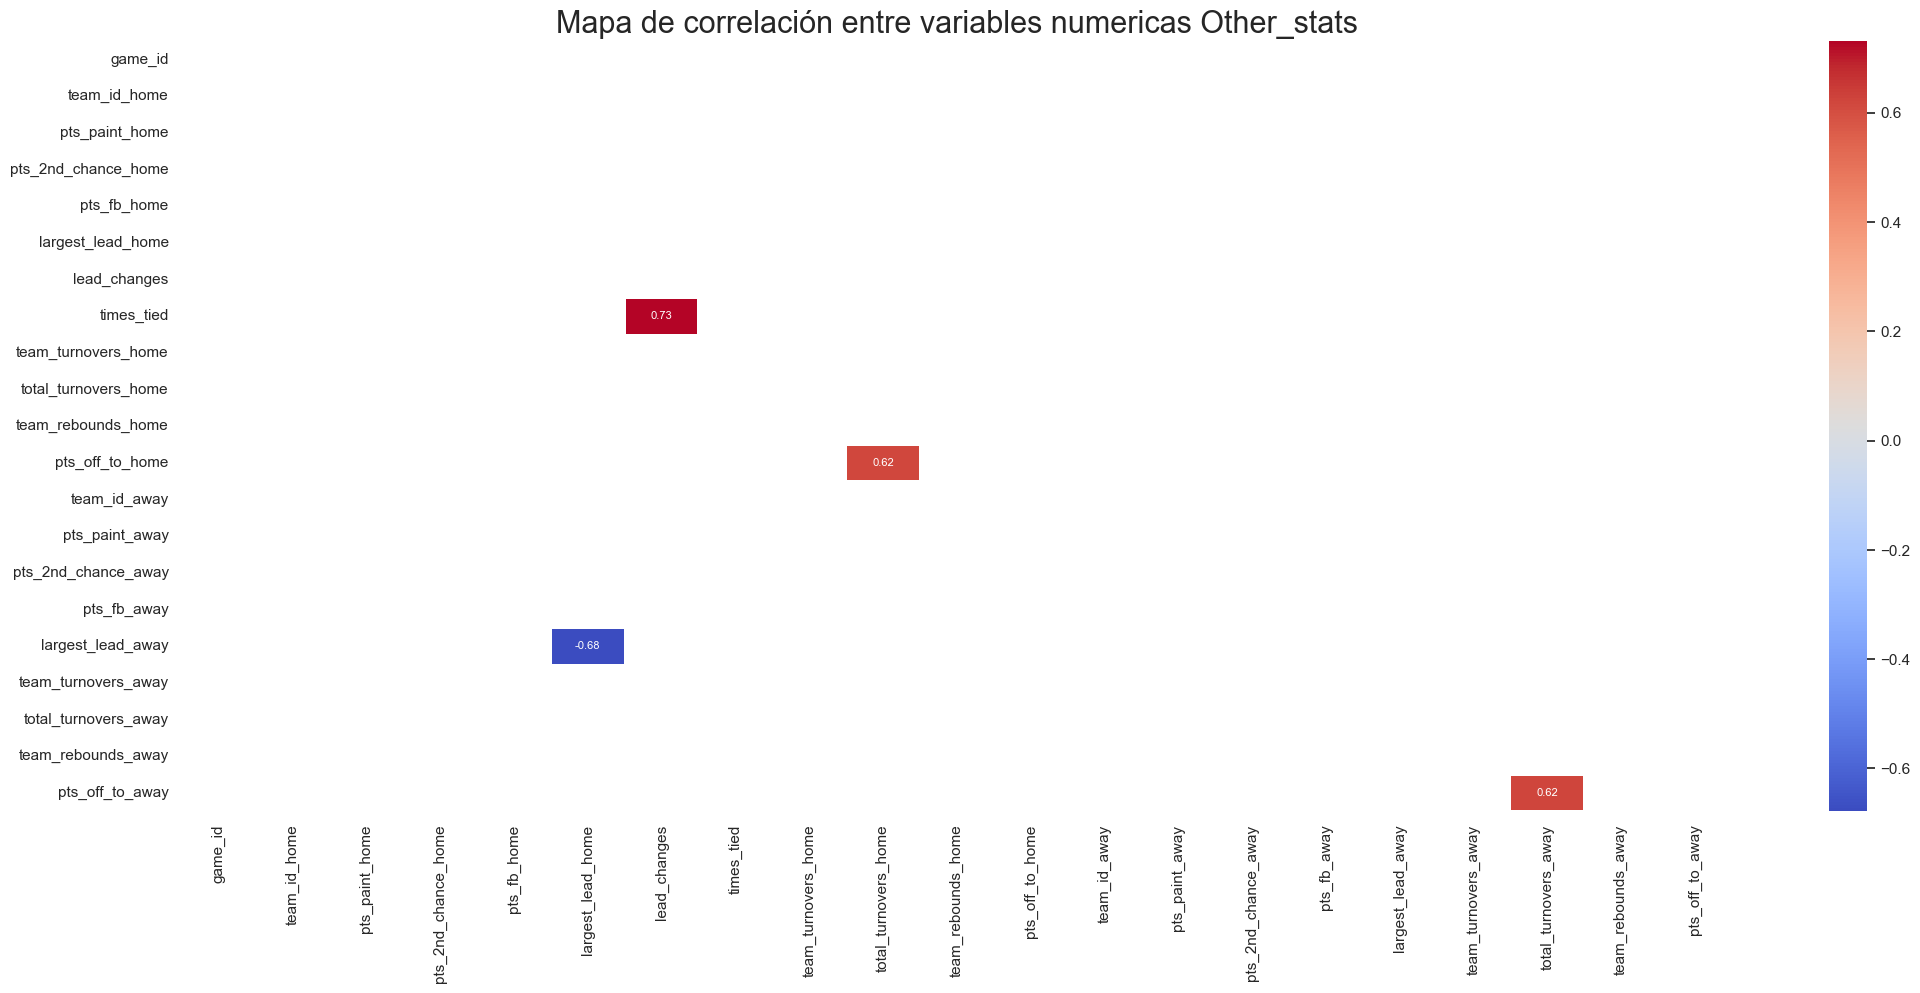

c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Desktop\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


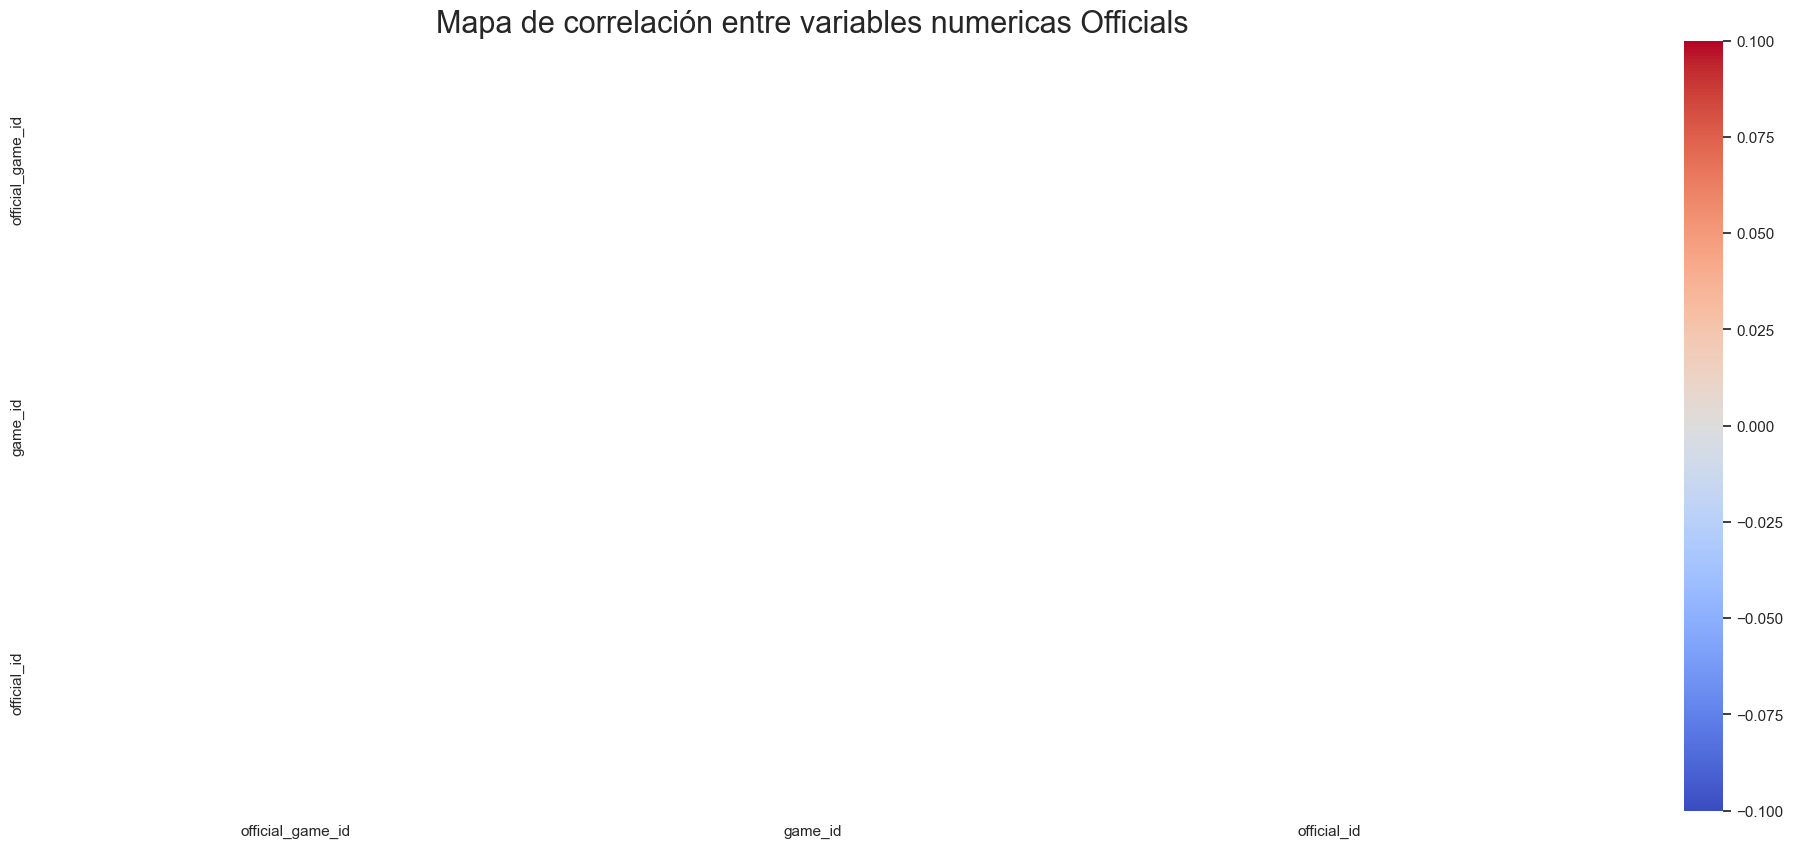

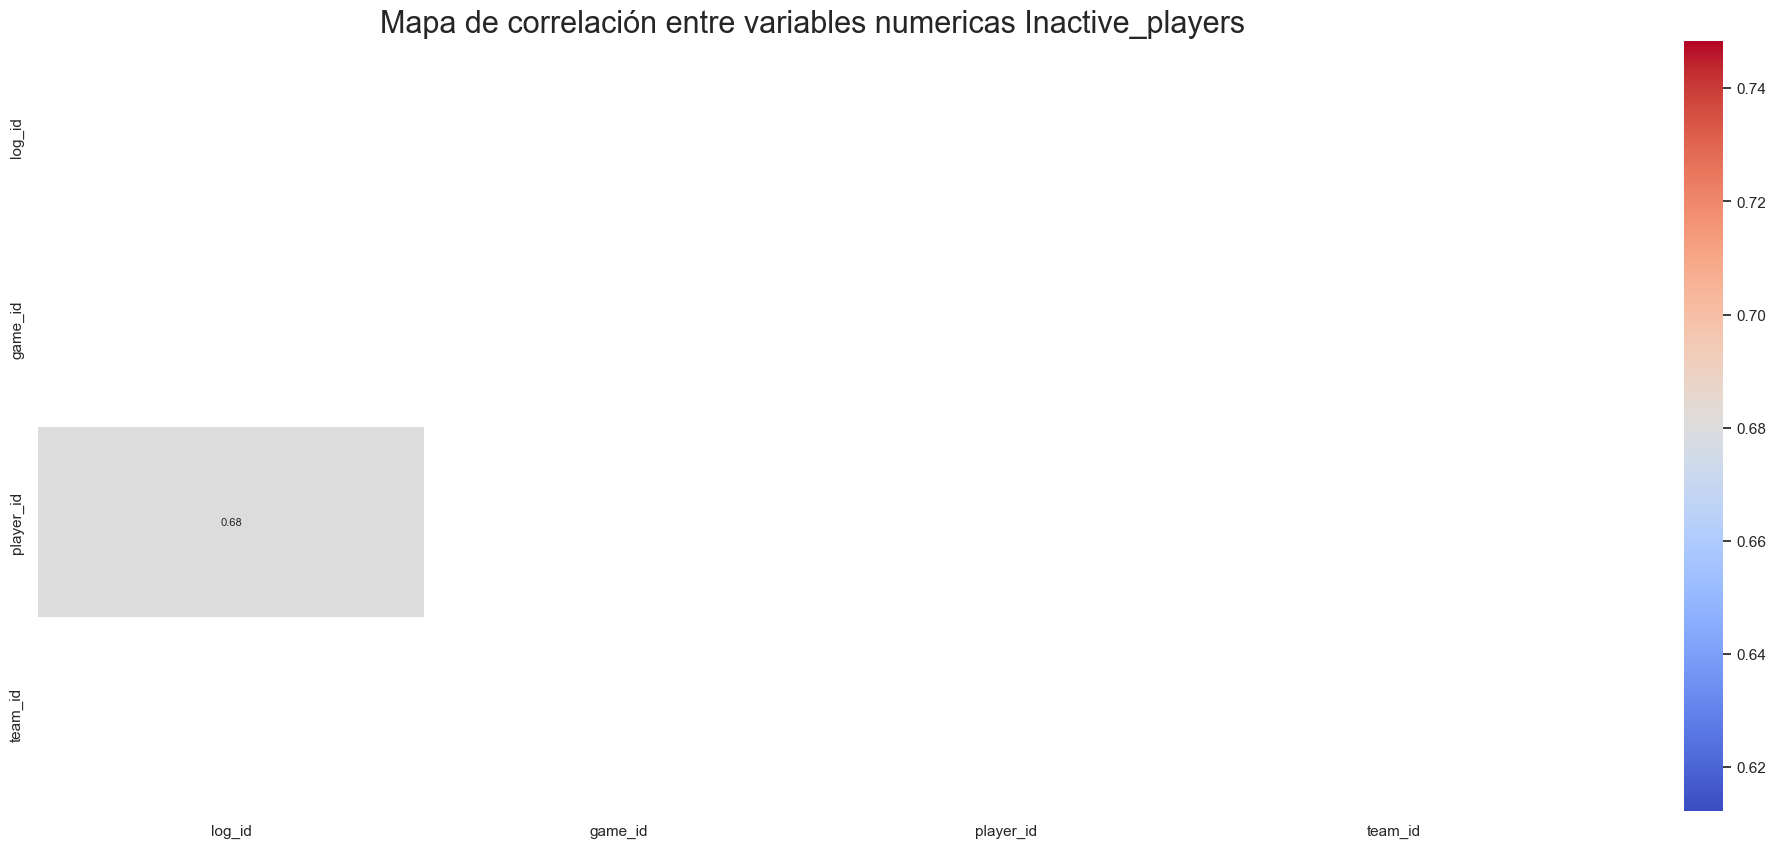

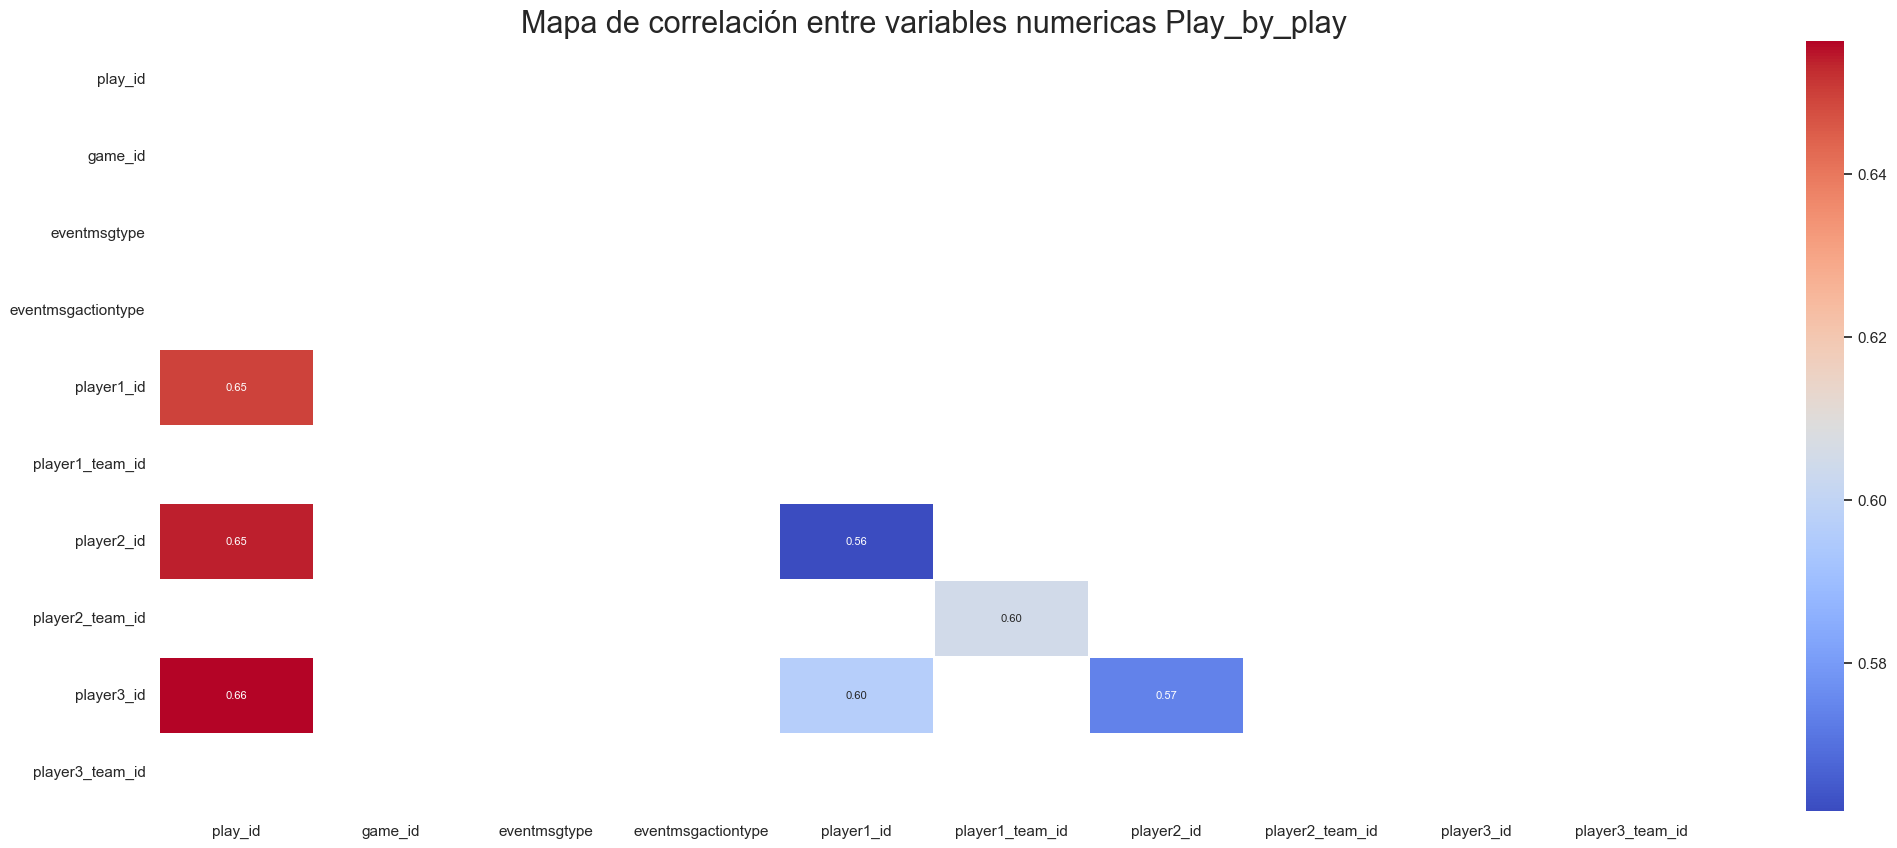

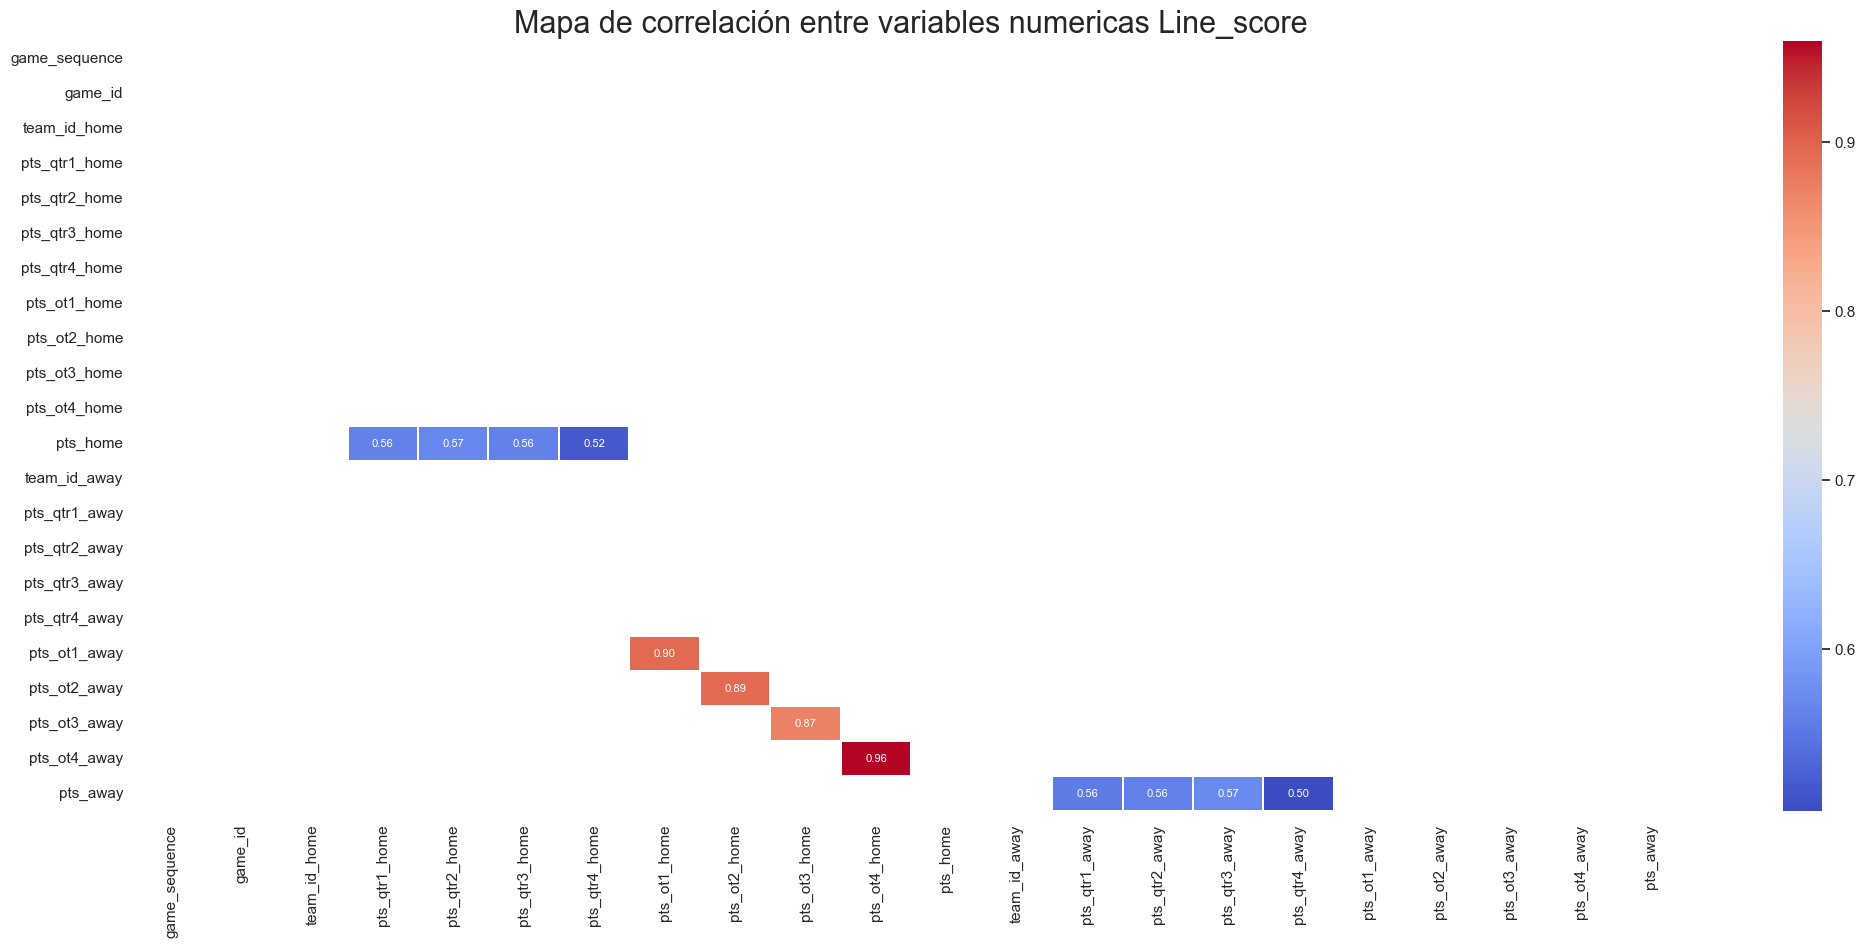

In [ ]:
columnas = [(player, 'Player'), (team, 'Team'), (game, 'Game'), (common_player_info, 'Common_player_info'), 
            (draft_combine_stats, 'Draft_combine_stats'), (draft_history, 'Draft_history'), (team_details, 'Team_details'), 
            (team_history, 'Team_history'), (game_info, 'Game_info'), (game_summary, 'Game_summary'), (other_stats, 'Other_stats'), 
            (officials, 'Officials'), (inactive_players, 'Inactive_players'), (play_by_play, 'Play_by_play'), (line_score, 'Line_score')]

for columna in columnas:
    
    corr = columna[0][columna[0].select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns].corr()

    sns.set_theme(style="white")

    #Generando mascara para el triangulo
    mask = np.triu(np.ones_like(corr, dtype=bool))

    corr = corr[abs(corr) >  abs(0.5)]

    #Generando la figura
    fig, ax = plt.subplots(figsize=(25,10))

    # Dibujando el mapa de calor
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"fontsize":8}, linewidths=0.08)

    plt.title(f'Mapa de correlación entre variables numericas {columna[1]}', fontsize=22)

    plt.show()


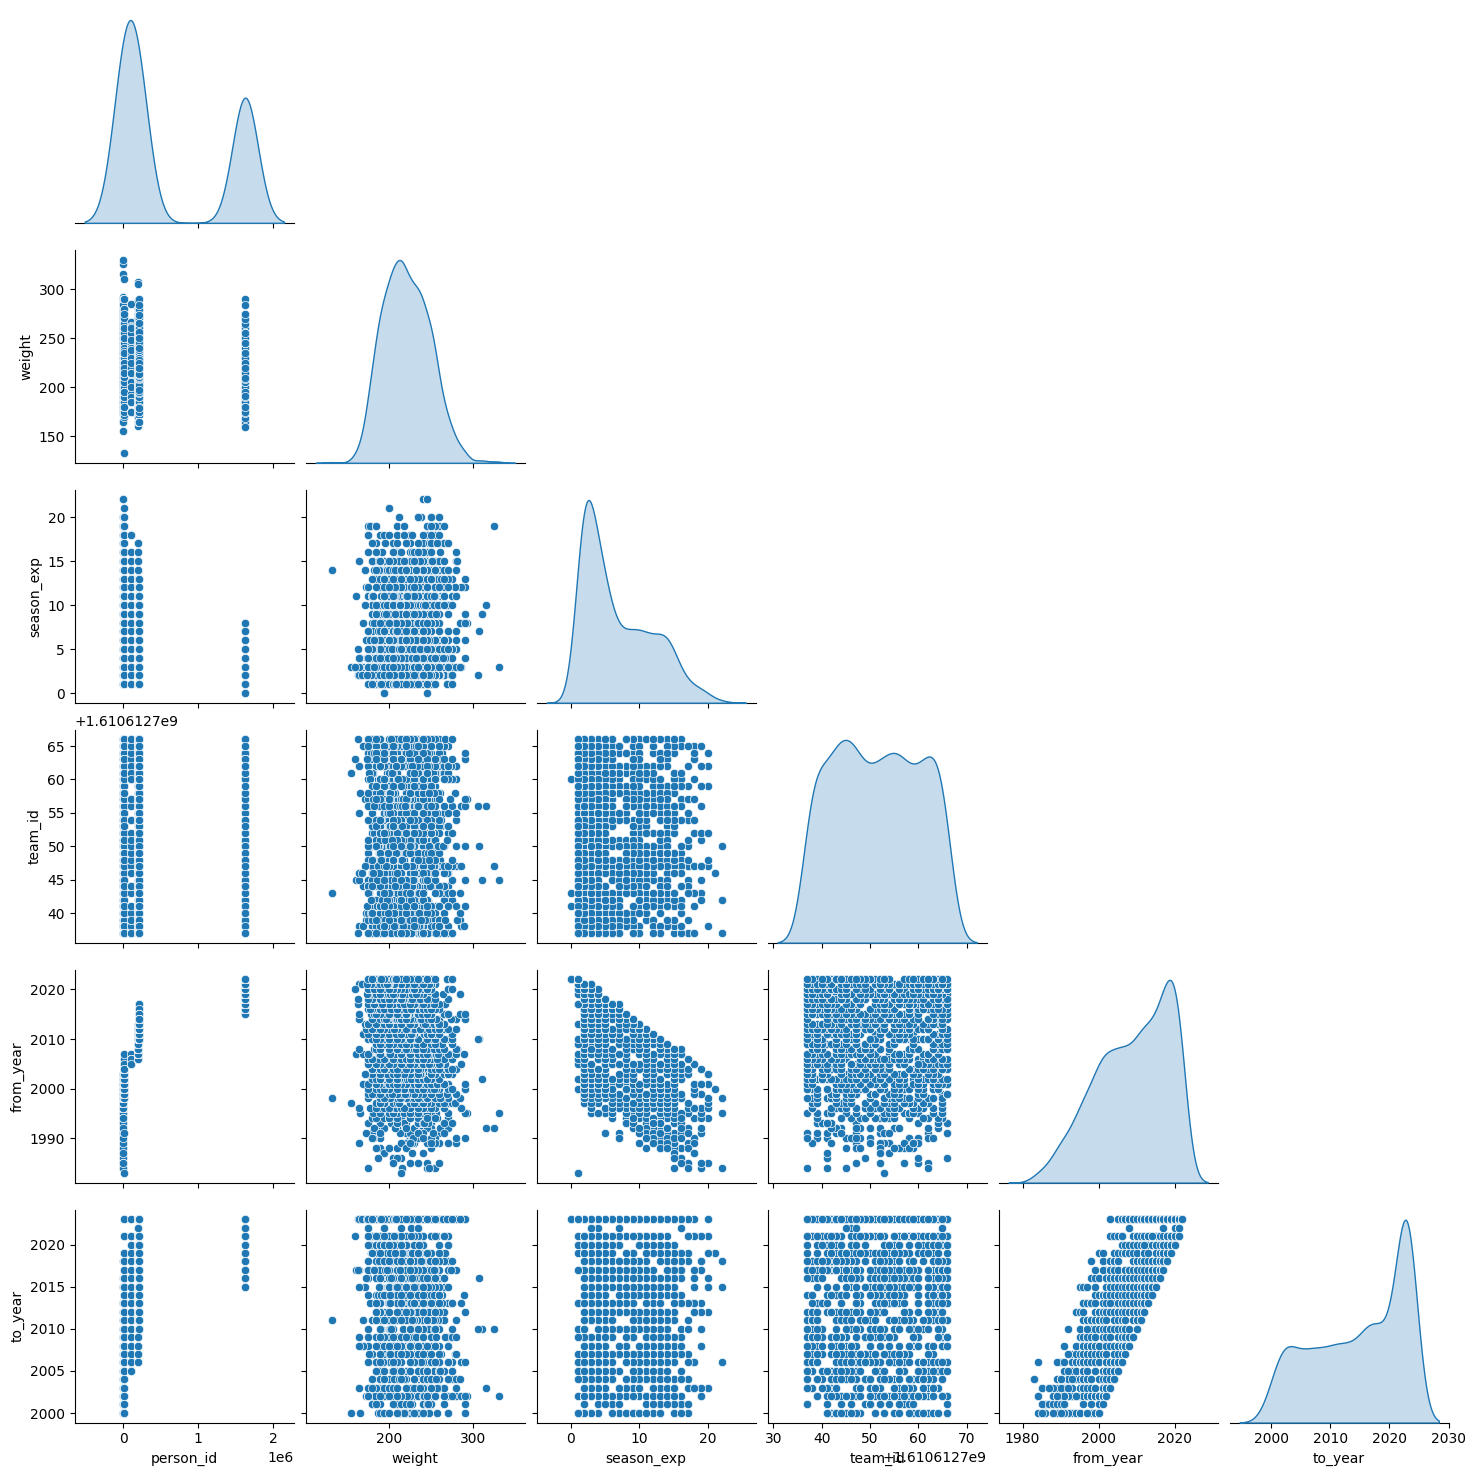

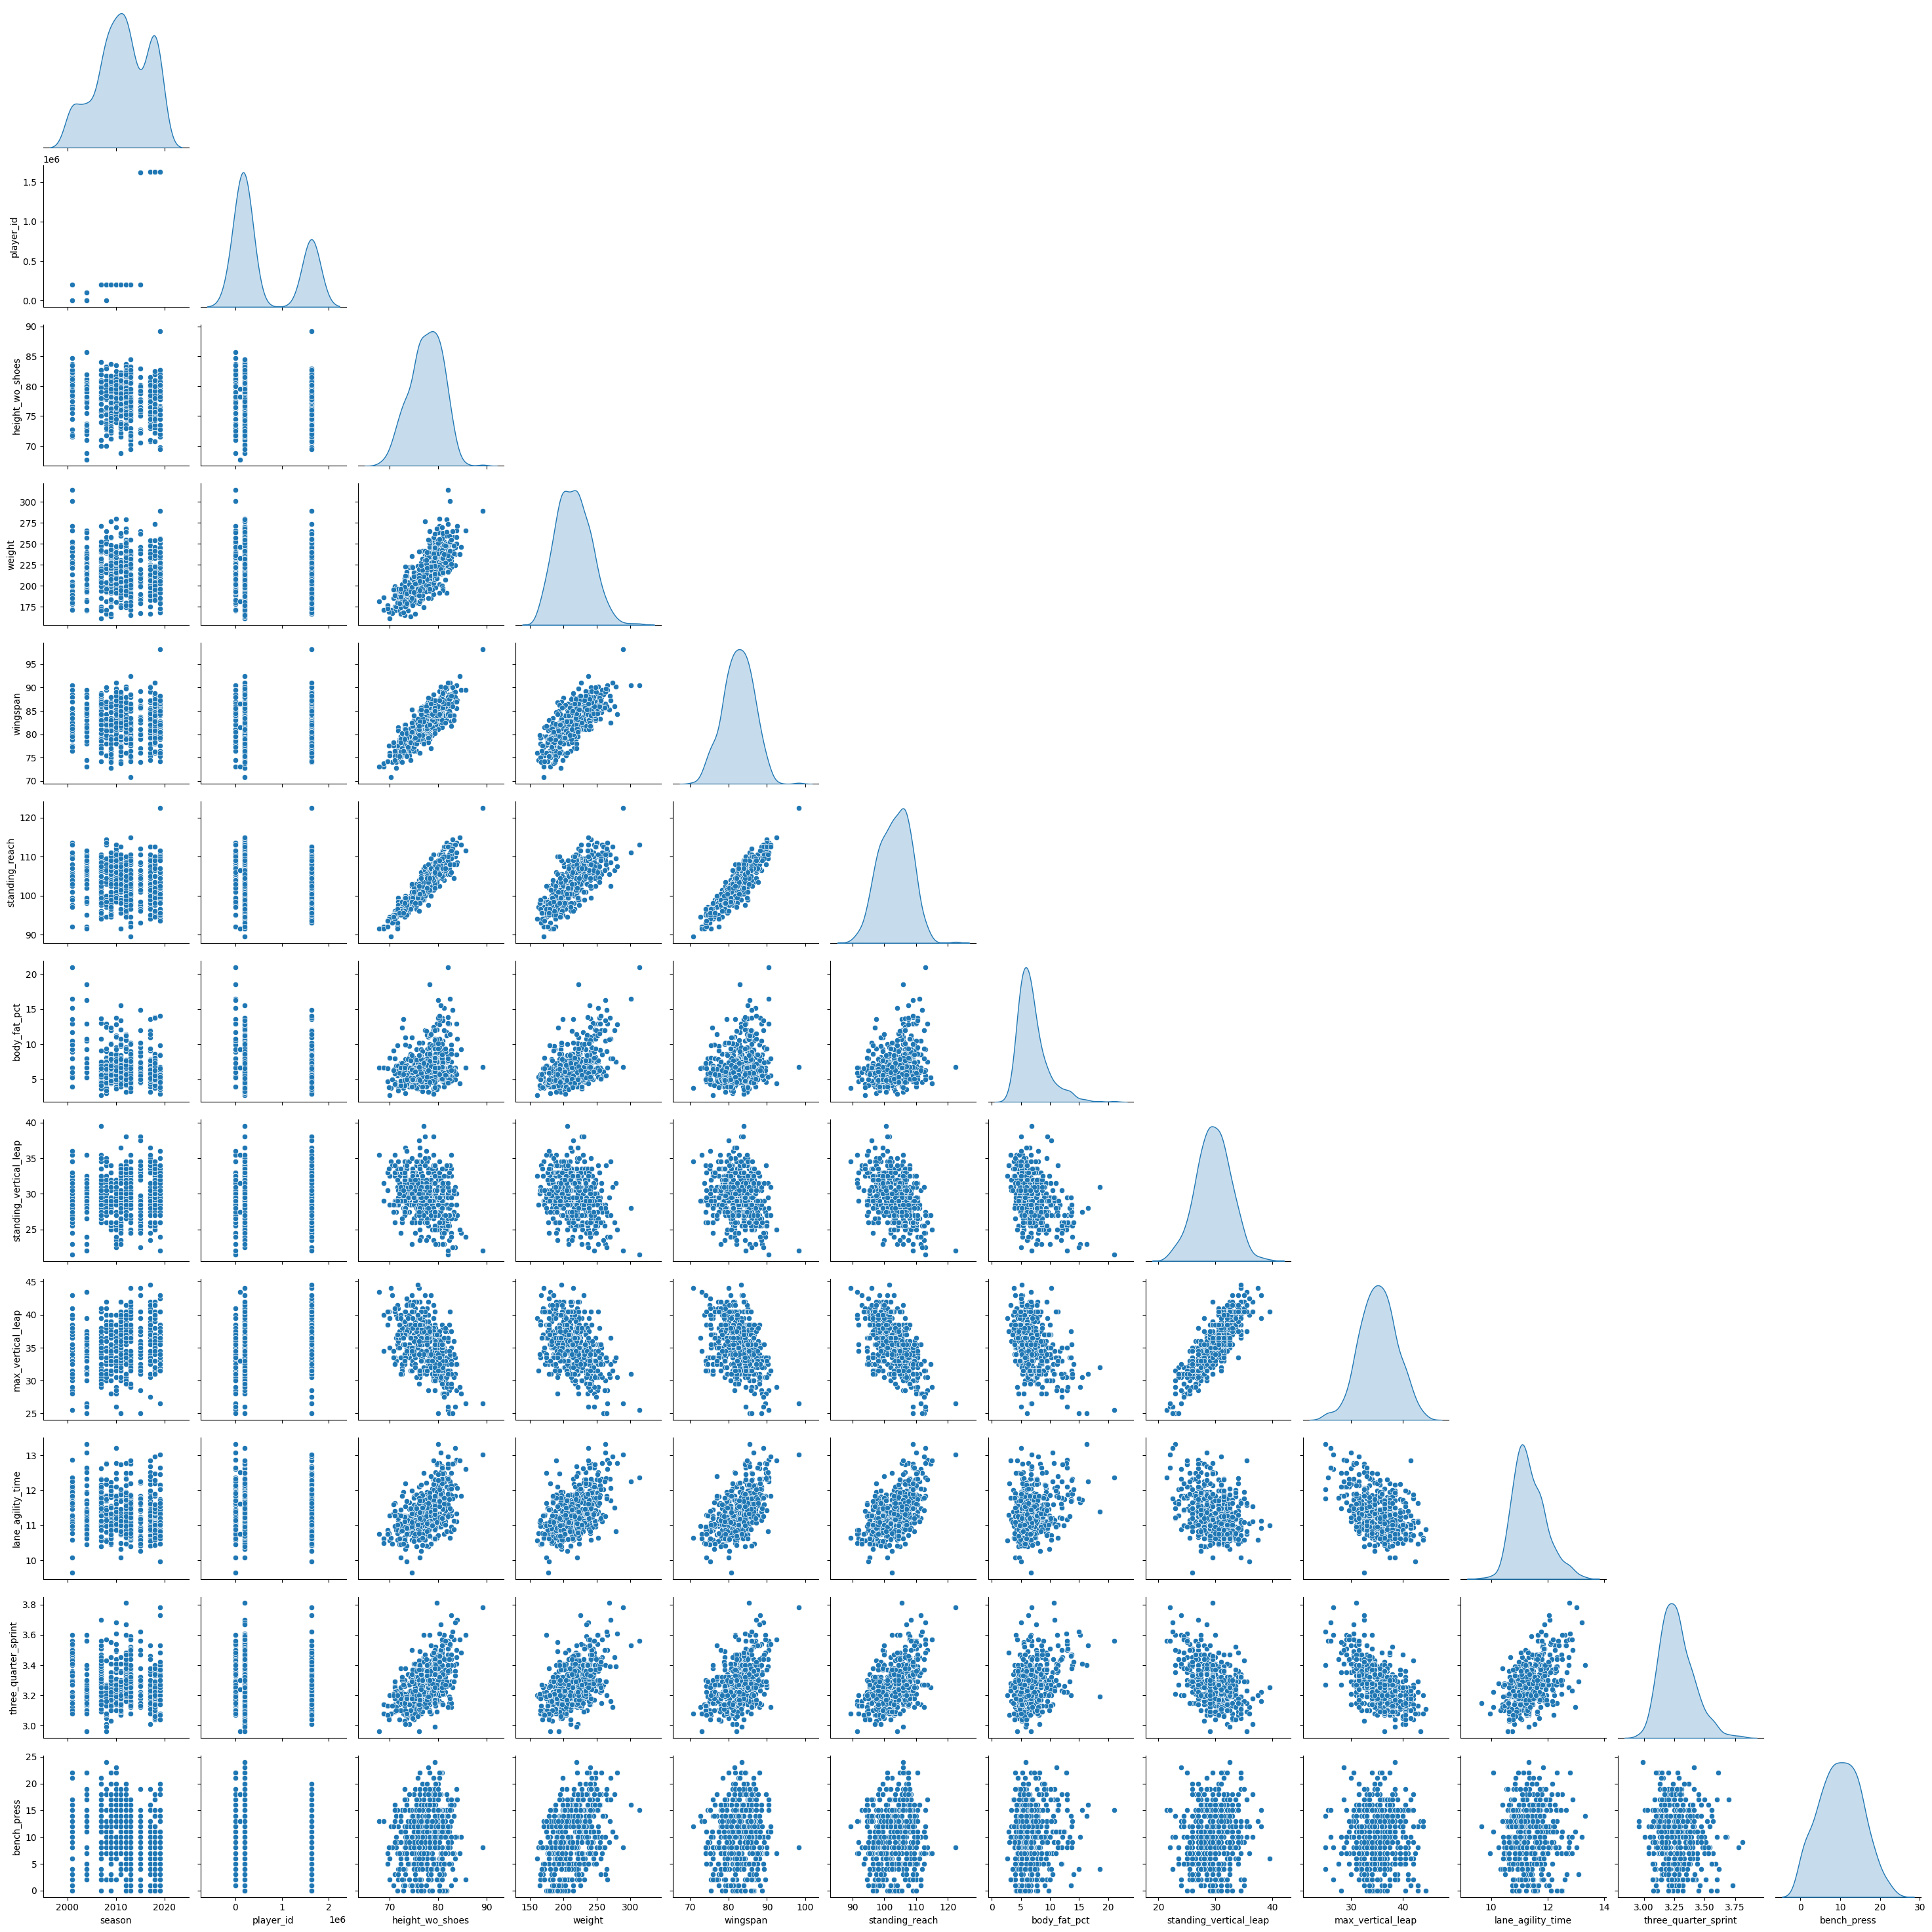

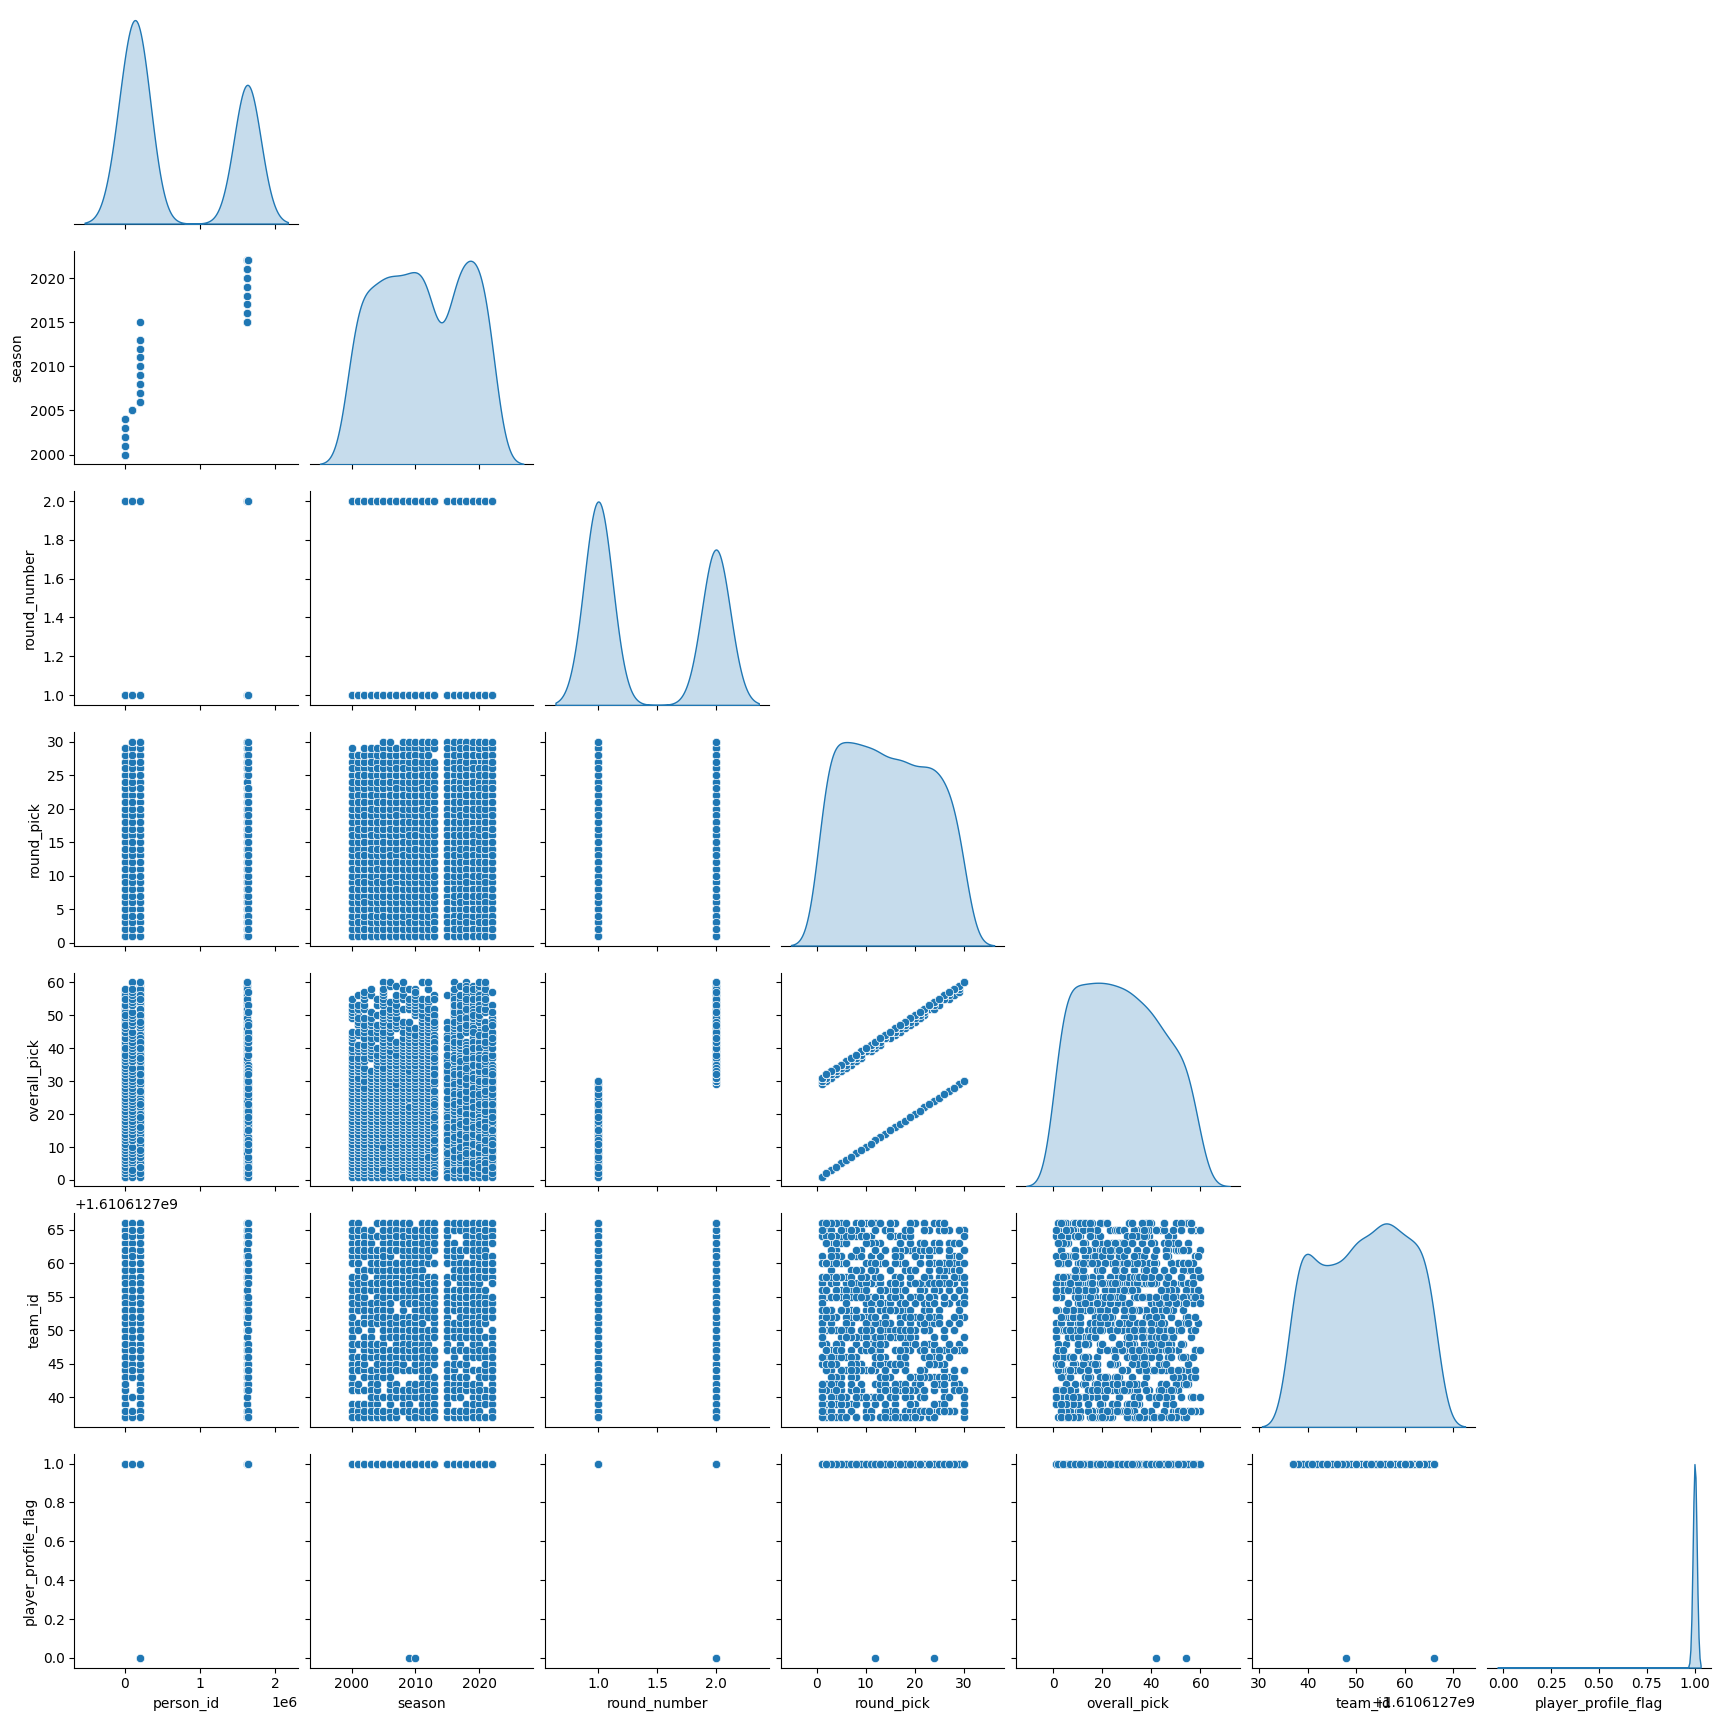

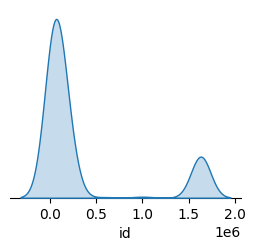

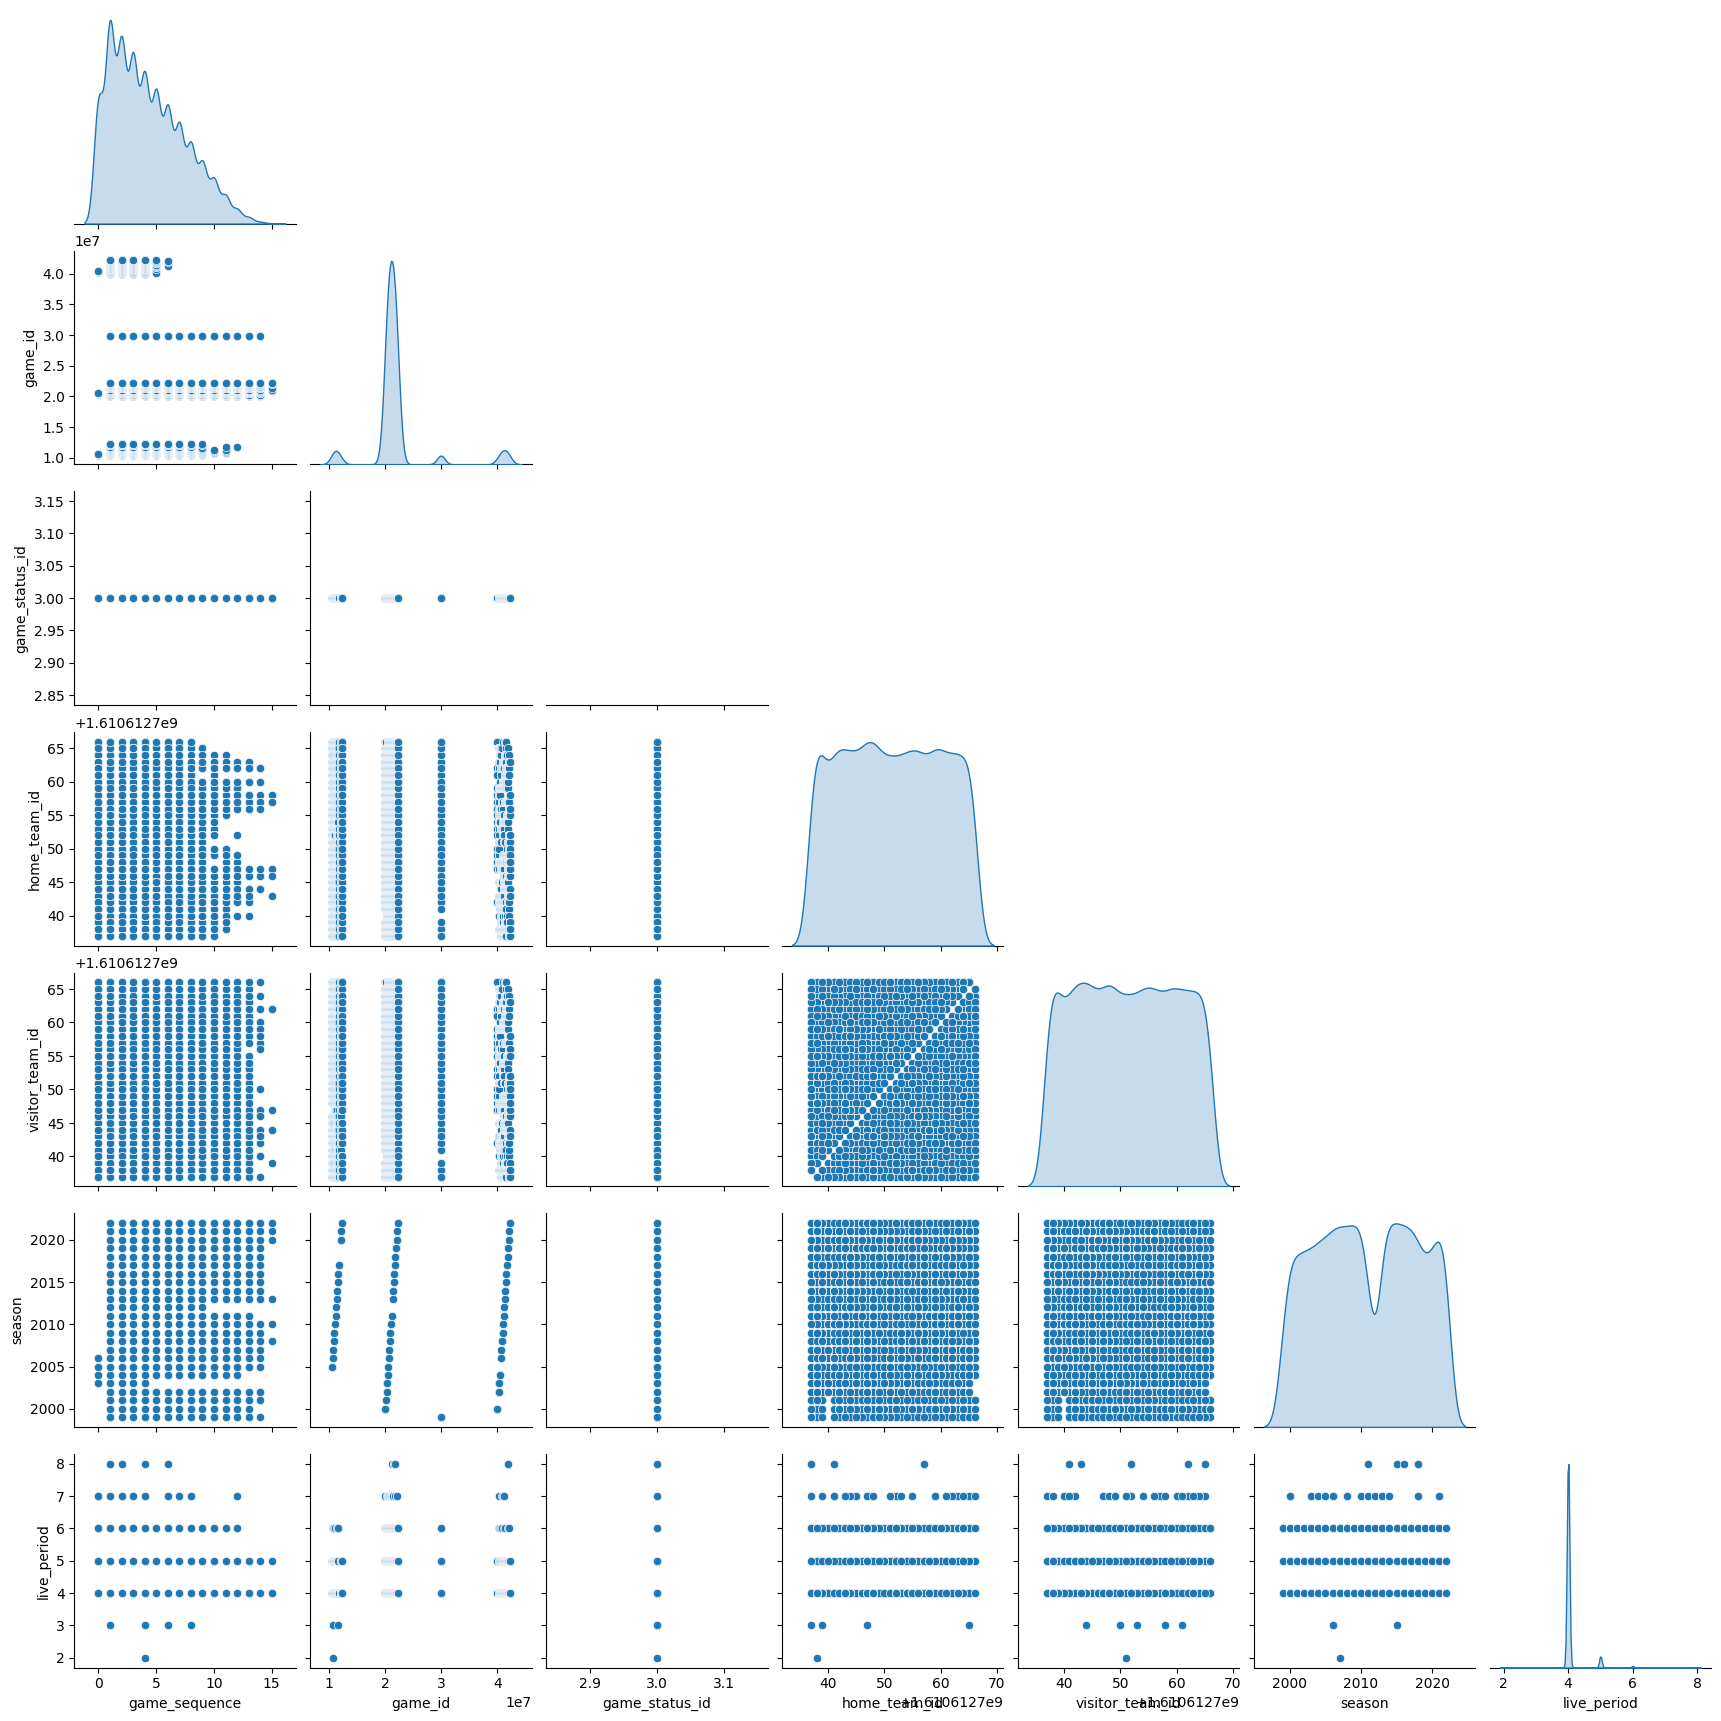

In [30]:
tablas_comparativas = [(common_player_info, 'Common Player Info'), (draft_combine_stats, 'Draft Combine Stats'), 
                       (draft_history, 'Draft History'), (player, 'Player'), (game_summary, 'Game Summary')]

for columna, nombre in tablas_comparativas:
    corr = columna[columna.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns].corr()
    high_corr = corr[abs(corr) >  abs(0.5)].index.tolist()
    sns.pairplot(columna[high_corr], corner=True, kind='scatter', diag_kind="kde" )
    plt.show()
    
    

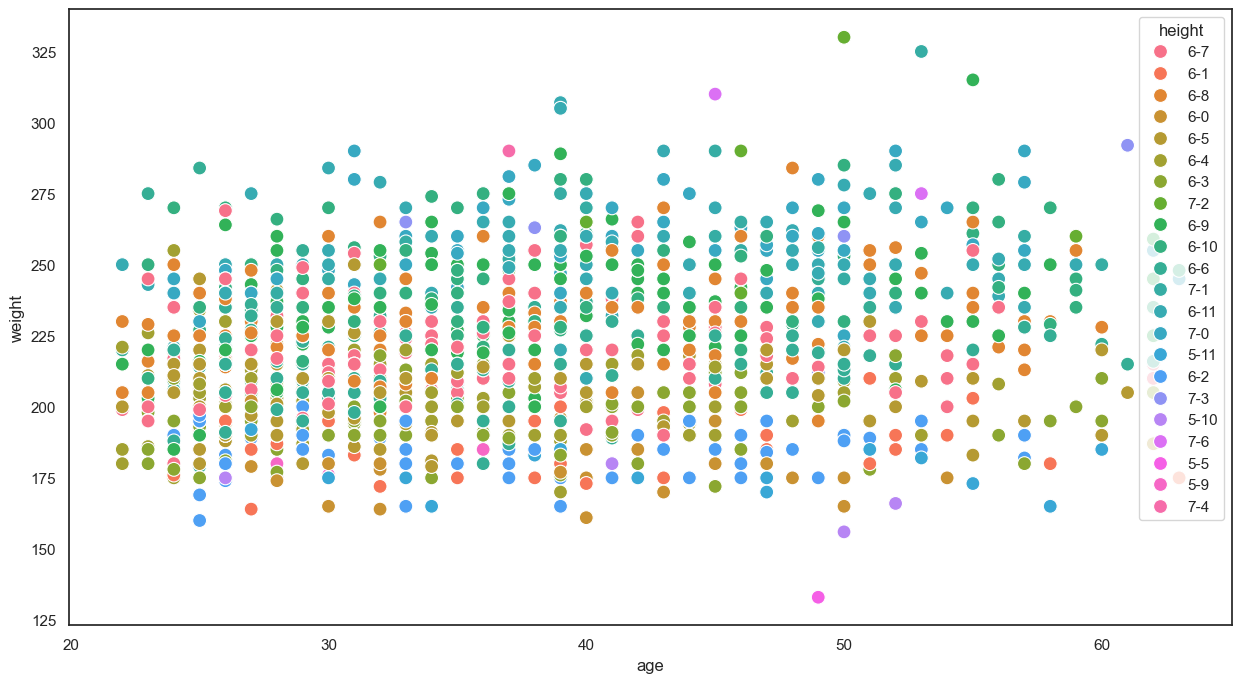

In [ ]:
hoy = date.today()
common_player_info['birthdate'] = pd.to_datetime(common_player_info['birthdate'])
common_player_info['age'] = hoy.year - common_player_info['birthdate'].dt.year 

plt.figure(figsize=(15, 8))
sns.scatterplot(data=common_player_info, x="age", y="weight", hue="height", s=100,)
plt.show()

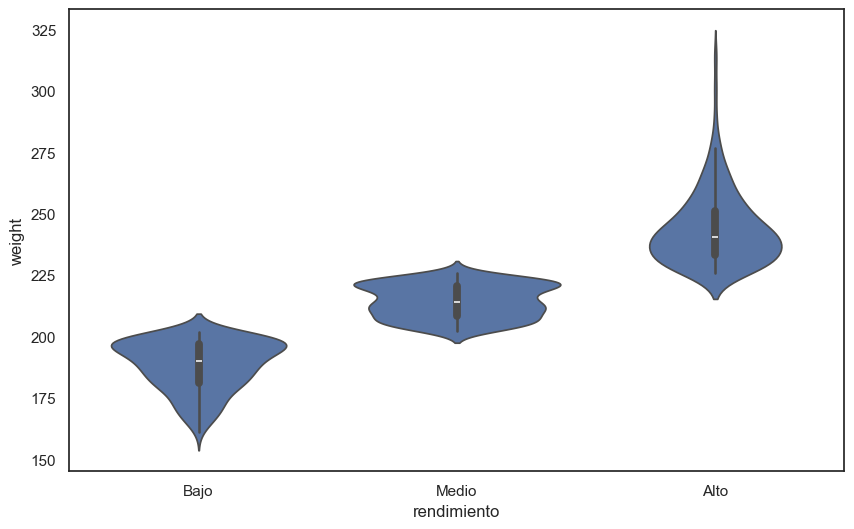

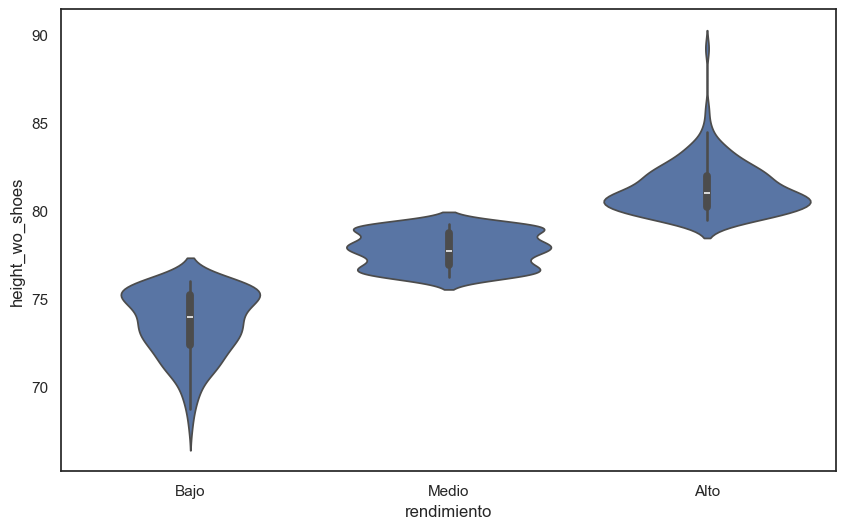

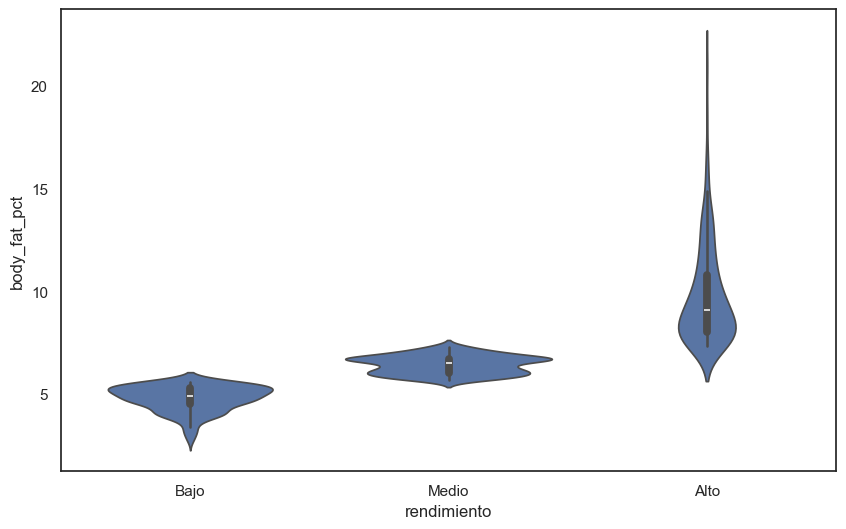

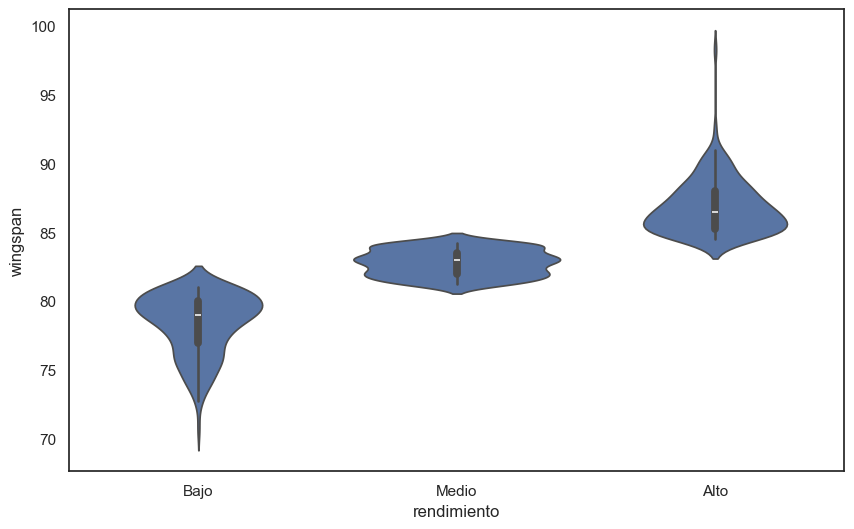

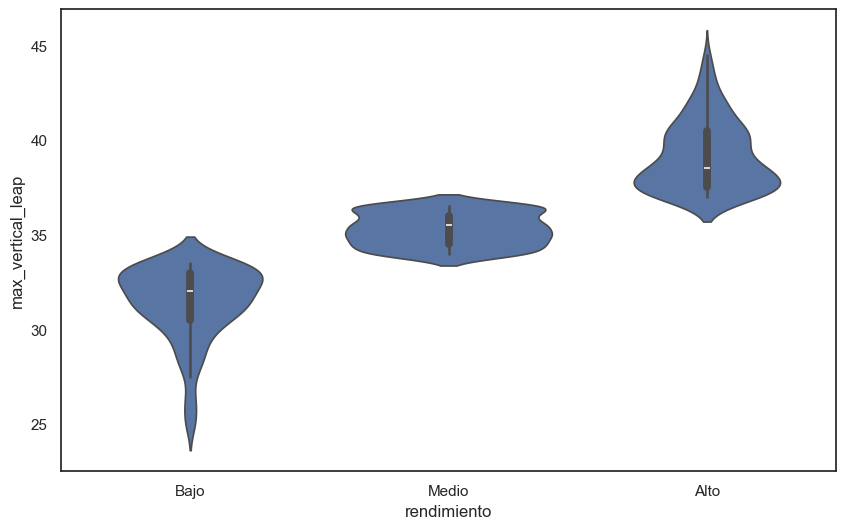

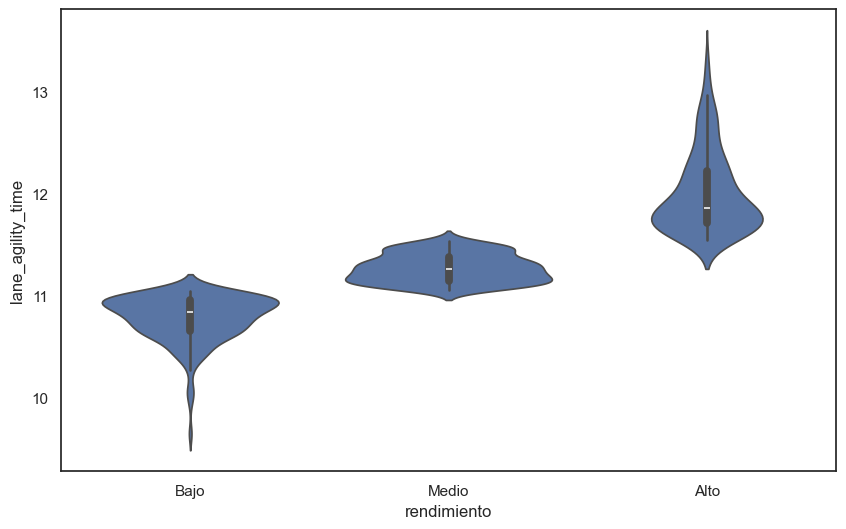

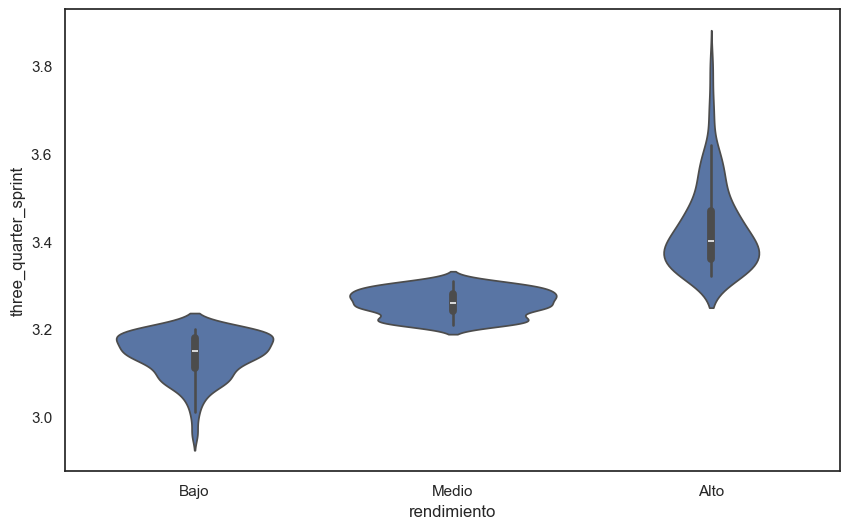

In [75]:
columnas = ['weight', 'height_wo_shoes', 'body_fat_pct', 'wingspan', 'max_vertical_leap', 'lane_agility_time', 'three_quarter_sprint']
for columna in columnas:
#Calcular una métrica de rendimiento (ejemplo: puntos por partido)
    player_perf = draft_combine_stats.groupby('player_id')[columna].mean().reset_index(name='ppg')

    #Merge con métricas físicas
    df_merge = draft_combine_stats.merge(player_perf, on='player_id')

    #Crear categorías de rendimiento (terciles)
    df_merge['rendimiento'] = pd.qcut(df_merge['ppg'], q=3, labels=['Bajo', 'Medio', 'Alto'])
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.violinplot(df_merge, x='rendimiento', y=columna)